## Overview of RC Model
---

This subsection describes the formulation of a physics-based model to simulate the thermal behaviour of the building using a resistor-capacitor (RC) model. This is based on an electrical analogy corresponding to the equivalent thermal physics. The model, shown in Figure 1, consists of one internal thermal capacitance, and five thermal resistances. This is also known as a 5R1C model and is based on the ISO 13790 standard.

<img src="./figures/5R1C.png" width=500>

Denoting by $T_m$, temperature of the theral mass in the room, the differential equation for the circuit in Figure is given by: 
$$\begin{equation}
T_m(H_{tr3} + H_{em}) + C_m\frac{dT_m}{dt} = \Phi_{mtot}
\end{equation} $$
where, $\Phi_{mtot}$ represents an equivalent thermal heat flux based on the solar heat gains, internal heat gains, external air temperature and the thermal conductance of the building elements:

$$\begin{equation}
\Phi_{mtot} = \Phi_{m} + H_{em}T_e + \frac{H_{tr3}}{H_{tr2}}\left(\Phi_{st} + H_wT_e + H_{tr1}T_{sup} +  \frac{H_{tr1}}{H_{ve}}(\Phi_{HC} + \Phi_{ia})\right)
\end{equation} $$
where: 
- $C_m$ is the thermal capacitance of the room, 
- $T_e$ is the external air temperature, 
- $T_{sup}$ is the conditioned air supply temperature
- $\Phi_{sol}$, solar heat gain and $\Phi_{int}$, internal heat gain, are represented by three equivalent fluxes: 
    - $\Phi_{ia}$ - heat exchange to the air, $T_{air}$
    - $\Phi_{st}$ - heat exachange to the internal room surface, $T_s$
    - $\Phi_{m}$ - heat exchange to the thermal mass, $T_m$
- $\Phi_{HC}$ - heating and cooling flux

The internal heat flow rates due to internal gains and solar sources are divided between the thermal nodes by:
$$\begin{align}
\Phi_{ia} &= 0.5 \cdot \Phi_{int} \\
\Phi_{m} &= \frac{A_m}{A_t}\left(0.5\Phi_{int} + \Phi_{sol}\right) \\
\Phi_{st} &= (1 - \frac{A_m}{A_t} - \frac{H_w}{9.1\cdot A_t})(0.5\Phi_{int} + \Phi_{sol})
\end{align}$$
where: 
- $A_t$ is the area of all surfaces facing the room
- $A_m$ is Effective Mass Area assuming a medium weight zone #12.3.1.2 ($\text{floor area} \cdot 2.5$)

#### Night time case 

$\Phi_{int} = 0$

tr - stands for transmittance 

#### $C_m$ - Thermal Capacitance of the medium [J/K]. Default based on ISO standard 12.3.1.2 for medium heavy zones
$$C_m = \text{thermal_capacitance_per_floor_area} \cdot \text{floor_area} \rightarrow C_m = c_f \cdot A_f$$
where: 
- thermal_capacitance_per_floor_area: Thermal capacitance of the room per floor area [J/m2K] **(--->165000)**
---

#### $H_{em}$ - Heat conductance from the outside through opaque elements [W/K]
$$H_{em} = u_{walls} \cdot \text{walls_area}$$
where: 
- $u_{walls}$ is U-value of opaque surfaces  $[W/m^2K]$
---
#### $H_{w}$ - Heat transfer from the outside through windows, doors [W/K], based on U-wert of 1W/m2K
$$H_{w} = u_{windows} \cdot \text{window_area}$$
where: 
- $u_{windows}$ is U-value of glazed surfaces  $[W/m^2K]$
---

#### $H_{ms}$ - Heat transfer coefficient between the internal surface temperature and the medium [W/K] 

$$H_{ms} = 9.1 \cdot \text{mass_area}$$
with: $$\text{mass_area} = \text{floor_area}\cdot2.5$$ - effective Mass Area assuming a medium weight zone (2.5 is probably walls height). <br> Thus: 
$$H_{ms} = 9.1 \cdot A_f \cdot 2.5$$

---
#### $H_{is}$ - Heat transfer coefficient between the air and the inside surface [W/K]
$$H_{is} = \text{total_internal_area} \cdot 3.45 \rightarrow H_{is} = A_t \cdot 3.45$$
where totač_internal_area ($A_t [m^2]$) is an area of all surfaces facing the room


#### $H_{ve_{adj}}$ - Ventilation heat transmission coefficient [W/K]
$$H_{ve_{adj}} = 1200 \cdot b_{ek} \cdot \text{room_vol} \cdot \frac{ach_{tot}}{3600}$$
where: 
1. $b_{ek}$ - temperature adjustment factor taking ventilation and infiltration, [ISO: E -27] <br>
$b_{ek} = (1 - \frac{ach_{vent}}{ach_{tot}}) \cdot \text{ventilation_efficiency}$
2. $ach_{tot}$ - Total Air Changes Per Hour <br>
$ach_{tot} = ach_{infl} + ach_{vent}$
    1. $ach_{vent}$: Air changes per hour through ventilation [Air Changes Per Hour] **(1.5)**
    2. $ach_{infl}$: Air changes per hour through infiltration [Air Changes Per Hour] **(0.5)**
---

The five thermal conductances $H$ are represented by three equivalent conductances:
$$H_{tr1} = \frac{1}{1/H_{ve} + 1/H_{is}}$$
$$H_{tr2} = H_{tr1} + H_w $$
$$H_{tr3} = \frac{1}{1/H_{tr2} + 1/H_{ms}}$$

Differential equation is discretised using the Crank-Nicolson method so it can be solved numerically as:
$$\begin{equation}
T_{m_{k+1}} = \frac{\Phi_{mtot} + T_{m_k}\left(\frac{C_m}{\Delta t} - 0.5\cdot(H_{tr3} + H_{em})\right)}{\frac{C_m}{\Delta t} + 0.5\cdot(H_{tr3} + H_{em})}
\end{equation}$$

#### time-varying paramters:
1. t_out 
2. solar gains
    1. Altitude
    2. Azimuth 
    3. normal_direct_radiation
    4. horizontal_diffuse_radiation
3. illuminance
    1. normal_direct_illuminance
    2. horizontal_diffuse_illuminace


---
---

#### $H_{em}$ - Heat conductance from the outside through opaque elements $[W/K]$
$$H_{em} = u_{walls} \cdot \text{walls_area}$$
where: 
- $u_{walls}$ is U-value of opaque surfaces  $[W/m^2K]$
- $\text{walls_area}$ is an area of all envelope surfaces, including windows in contact with the outside.
---
#### $H_{w}$ - Heat transfer from the outside through windows, doors [W/K], based on U-wert of 1W/m2K
$$H_{w} = u_{windows} \cdot \text{window_area}$$
where: 
- $u_{windows}$ is U-value of glazed surfaces  $[W/m^2K]$
- $\text{window_area}$ is an area of the glazed surface in contact with the outside $[m^2]$

## U-values 
reference: https://www.designingbuildings.co.uk/wiki/U-values

#### What are U-values?
U-values (sometimes referred to as heat transfer coefficients or thermal transmittances) are a measure of how effective the elements of a building's fabric are as insulators. That is, the degree to which they prevent heat from transmitting between the inside and the outside of a building.

The lower the U-value of an element of a building's fabric, the more slowly heat is able to transmit through it, and so the better it performs as an insulator.

Very broadly, the better (i.e. lower) the U-value of a building's fabric, the less energy is required to maintain comfortable conditions inside the building. As energy prices increase, and there is greater awareness of sustainability, performance measures such as U-values have become more important, and building standards (such as the Building Regulations) have required that lower and lower U-values are achieved. This has required changes in the design of buildings, both in the use of materials (such as insulation), the make-up of the building elements (such as cavity walls and double glazing), and the overall make up of a building's fabric (for example, reducing the proportion of glazing).



U-values are used to measure different parts of a building structure including:
- Roof
- Walls
- Floor
- Doors
- Windows

#### What are the U-values of commonly building components?
U-values are measured in watts per square metre per kelvin (W/(m²K)). For example, a double glazed window with a U-value of 2.8, means that for every degree difference in temperature between the inside and outside of the window, 2.8 watts will be transmitted every square metre.

A range of typical U-values are:
- Solid brick wall: 2 W/(m²K)
- Cavity wall with no insulation: 1.5 W/(m²K).
- Insulated wall: 0.18 W/(m²K).
- Single glazing: 4.8 to 5.8 W/(m²K).
- Double glazing: 1.2 to 3.7 W/(m²K) depending on type.
- Triple glazing below: 1 W/(m²K).
- Solid timber door: 3 W/(m²K). 

It is important to distinguish between U-values for materials (such as glass), or assemblies (such as windows, which have frames, air gaps, and so on), or elements (such as walls, which may have complex constructions comprising a number of different components).

---
Range of U-values: 
$$u_{walls} \in [0.1,3]$$
$$u_{windows} \in [1,6]$$

### $A_t$ - total internal area

<img src="./figures/total_internal_area.drawio.png" width=500>

## Import Modules
---

In [1]:
#thermal model
from building_physics import Zone
import supply_system
import emission_system
from radiation import Location
from radiation import Window

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d

#pytorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch import Tensor
import time

#torchdiffeq
import torchdiffeq

#auxiliary
import os
import datetime
from IPython.display import clear_output
import copy


#from training_utility_functions.py 
from training_utility_functions import get_batch
from training_utility_functions import RunningAverageMeter
from training_utility_functions import visualize
from training_utility_functions import cooling_5R1C


In [2]:
# Define Windows
SouthWindow = Window(azimuth_tilt=0, alititude_tilt = 90, glass_solar_transmittance=0.7,
                     glass_light_transmittance=0.8, area = 4)

In [3]:
# Read Occupancy Profile
occupancyProfile=pd.read_csv(os.path.join("./",'auxiliary','schedules_el_Office.csv'))

# Define constants for the building
gain_per_person = 100 #W per person
appliance_gains= 14 #W per sqm
max_occupancy= 3.0 

In [4]:
# Initialise Zurich location with a Zurich weather file in the auxillary folder
Zurich = Location(epwfile_path='./auxiliary/Zurich-Kloten_2013.epw')

# Initialise a building with default parameters
Office=Zone(window_area=4.0,
            walls_area=15.0,
            floor_area=35.0,
            room_vol=105,
            total_internal_area=142.0,
            lighting_load=11.7,
            lighting_control = 300.0,
            lighting_utilisation_factor=0.45,
            lighting_maintenance_factor=0.9,
            u_walls = 0.2,
            u_windows = 1.1,
            ach_vent=1.5,
            ach_infl=0.5,
            ventilation_efficiency=0.6,
            thermal_capacitance_per_floor_area = 160000,
            t_set_heating = 21.0,
            t_set_cooling = 24.0,
            max_cooling_energy_per_floor_area=-np.inf,
            max_heating_energy_per_floor_area=np.inf,
            heating_supply_system=supply_system.OilBoilerMed,
            cooling_supply_system=supply_system.HeatPumpAir,
            heating_emission_system=emission_system.NewRadiators,
            cooling_emission_system=emission_system.AirConditioning)

## Base experiment with no heating and constant outside temperature during the night hours

In [5]:
cooling_experiment = cooling_5R1C(location = Zurich, 
                                  office = Office, 
                                  window = SouthWindow, 
                                  latitude = 47.480, 
                                  longitude=8.536,
                                  year=2015)

In [6]:
cooling_experiment.train(t_m_prev = 23., 
                         t_start_cooling=0,
                         delta_t=5, 
                         t_end = 6,
                         constant_temp=True, temp_value=1,
                         constant_solar_gain=True, solar_gain_value=0,
                         constant_illuminance=False, illuminance_value=None,
                         constant_occupancy = True, occupancy_value = 0, max_occupancy=3.,
                         gain_per_person = 100, appliances_gain=14)

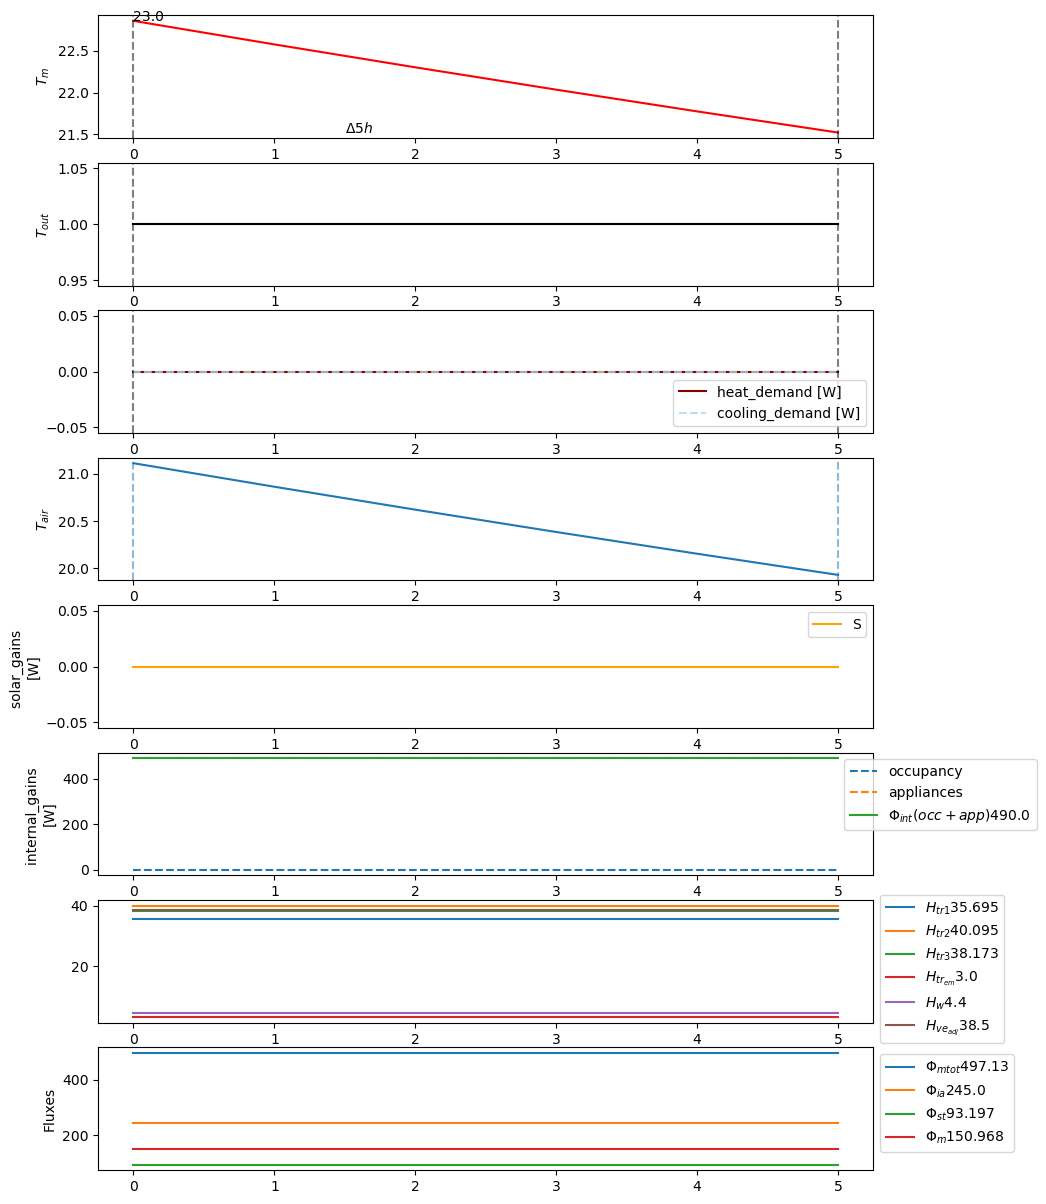

In [7]:
cooling_experiment.plot_results()

In [106]:
Te = cooling_experiment.temp_value #we first set the constant temperature of 1ºC (Te - external temperature)
t_out = Te
print("Te:", Te)

phi_int = cooling_experiment.internal_gains_[0]
print("phi_int:", phi_int)

phi_ia = cooling_experiment.phi_ias[0]
print("phi_ia:", phi_ia)

phi_m = cooling_experiment.phi_ms[0]
print("phi_m:", phi_m)

phi_st = cooling_experiment.phi_sts[0]
print("phi_st: ", phi_st)

A_f = cooling_experiment.office.floor_area
print("A_f: ", A_f)

A_m = cooling_experiment.office.mass_area
print("A_m: ", A_m)

A_t = cooling_experiment.office.A_t
print("A_t: ", A_t)

h_tr1 = cooling_experiment.office.h_tr_1
print("h_tr1:", h_tr1)

h_tr2 = cooling_experiment.office.h_tr_2
print("h_tr2:", h_tr2)

h_tr3 = cooling_experiment.office.h_tr_3
print("h_tr3:", h_tr3)

h_em = cooling_experiment.office.h_tr_em
print("h_em:", h_em)

h_w = cooling_experiment.office.h_tr_w
print("h_w:", h_w)

h_ve = cooling_experiment.office.h_ve_adj
print("h_ve:", h_ve)

C_m = cooling_experiment.office.c_m
print("C_m:", C_m)

c_f = cooling_experiment.office.c_m / cooling_experiment.office.floor_area / 1e5
print("c_f:", c_f)

u_walls = cooling_experiment.office.u_walls
print("u_walls:", u_walls)

u_window = cooling_experiment.office.u_windows
print("u_window:", u_window)

walls_area = cooling_experiment.office.walls_area
print("walls_area:", walls_area)

window_area = cooling_experiment.office.window_area
print("window_area:", window_area)

Te: 1
phi_int: 490.0
phi_ia: 245.0
phi_m: 150.9683098591549
phi_st:  93.19745395449621
A_f:  35.0
A_m:  87.5
A_t:  142.0
h_tr1: 35.69483345950038
h_tr2: 40.09483345950038
h_tr3: 38.17266498803948
h_em: 3.0
h_w: 4.4
h_ve: 38.5
C_m: 5600000.0
c_f: 1.6
u_walls: 0.2
u_window: 1.1
walls_area: 15.0
window_area: 4.0


### Total heat flux $\Phi_{mtot} = ?$

$$\Phi_{mtot} = \Phi_m + H_{em}\cdot T_e + \frac{H_{tr3}}{H_{tr2}}\left(\Phi_{st} + H_w \cdot T_e  +  H_{tr1} \cdot T_e  + \frac{H_{tr1}}{H_{ve}}\Phi_{ia}\right)$$

In [107]:
#formula from the model 
phi_m_tot_model = phi_m + h_em * t_out + \
            h_tr3 * (phi_st + h_w * t_out + h_tr1 *
                           ((phi_ia / h_ve) + t_out)) / h_tr2
phi_m_tot_model

497.1297858474096

## Rearranging the ODE 

\begin{equation}
T_m(H_{tr3} + H_{em}) + C_m\frac{dT_m}{dt} = \Phi_{mtot}
\end{equation} 

$$
\rightarrow \frac{dT_m}{dt} = \frac{1}{C_m}\left(\Phi_{m_{tot}} - (H_{tr3} + H_{em}) \cdot T_m\right) 
$$
with:  $$T_m(0) = 23$$

$$\Phi_{mtot} = \frac{A_m}{A_t}\cdot0.5\cdot\mathbf{\Phi_{int}} + H_{em}\cdot\mathbf{T_e} + \frac{H_{tr3}}{H_w + H_{tr1}}\left((1 - \frac{A_m}{A_t} - \frac{H_w}{9.1\cdot A_t})\cdot0.5\cdot\Phi_{int} + \mathbf{T_e}\cdot (H_w + H_{tr1}) +  \frac{H_{tr1}}{H_{ve}}\cdot0.5\cdot\mathbf{\Phi_{int}})\right)$$
where: <br>
$$A_m = \text{mass_area}\rightarrow A_m = \text{floor_area} · 2.5 \rightarrow A_m = A_f · 2.5 \rightarrow A_m = 35.0 \cdot 2.5 \rightarrow A_m= 87.5$$<br>
$$A_t = \text{total_internal_area, being the area of all surfaces facing the room} = 142.0$$<br>

---
below is another adjustment of the ODE with an update: $A_m=A_f \cdot 2.5$ and $C_m = A_f \cdot c_f$

\begin{equation}
T_m(H_{tr3} + H_{em}) + C_m\frac{dT_m}{dt} = \Phi_{mtot}
\end{equation} 

$$
\rightarrow \frac{dT_m}{dt} = \frac{1}{C_m}\left(\Phi_{m_{tot}} - (H_{tr3} + H_{em}) \cdot T_m\right) 
$$
$$
\rightarrow \frac{dT_m}{dt} = \frac{1}{A_f\cdot c_f}\left(\Phi_{m_{tot}} - (H_{tr3} + H_{em}) \cdot T_m\right) 
$$
with:  $$T_m(0) = 24$$

$$\Phi_{mtot} = \frac{A_f\cdot 2.5}{A_t}\cdot0.5\cdot\mathbf{\Phi_{int}} + H_{em}\cdot\mathbf{T_e} + \frac{H_{tr3}}{H_w + H_{tr1}}\left((1 - \frac{A_f\cdot 2.5}{A_t} - \frac{H_w}{9.1\cdot A_t})\cdot0.5\cdot\Phi_{int} + \mathbf{T_e}\cdot (H_w + H_{tr1}) +  \frac{H_{tr1}}{H_{ve}}\cdot0.5\cdot\mathbf{\Phi_{int}})\right)$$
where: <br>
$$c_f = \text{thermal_capacitance_per_floor_area}$$
$$A_m = \text{mass_area}$$
$$A_f = \text{floor_area}$$
$$\rightarrow A_m = A_f\cdot 2.5$$<br>
$$A_t = \text{total_internal_area}$$
$$\rightarrow A_t = 142.0$$

In [108]:
#adjusted formula of total heat flux
phi_m_tot_1 = (2.5*A_f/A_t)*0.5*phi_int + h_em * t_out + \
            (h_tr3/(h_w + h_tr1)) * ((1-(2.5*A_f/A_t) - (h_w/(9.1*A_t)))*0.5*phi_int + t_out*(h_w + h_tr1) + \
                           (h_tr1/h_ve)*0.5*phi_int)
print(phi_m_tot_1)

if phi_m_tot_model == phi_m_tot_1:
    print("Valid formula extension")
else: 
    print("NOT VALID!")

497.1297858474096
Valid formula extension


## Defining Neural ODE 
(for constant Te)

\begin{equation}
T_m(H_{tr3} + H_{em}) + C_m\frac{dT_m}{dt} = \Phi_{mtot}
\end{equation} 

$$
\rightarrow \frac{dT_m}{dt} = \frac{1}{C_m}\left(\Phi_{m_{tot}} - (H_{tr3} + H_{em}) \cdot T_m\right) 
$$
with:  $$T_m(0) = 23$$

$$\Phi_{mtot} = \frac{A_f\cdot 2.5}{A_t}\cdot0.5\cdot\mathbf{\Phi_{int}} + H_{em}\cdot\mathbf{T_e} + \frac{H_{tr3}}{H_w + H_{tr1}}\left((1 - \frac{A_f\cdot 2.5}{A_t} - \frac{H_w}{9.1\cdot A_t})\cdot0.5\cdot\Phi_{int} + \mathbf{T_e}\cdot (H_w + H_{tr1}) +  \frac{H_{tr1}}{H_{ve}}\cdot0.5\cdot\mathbf{\Phi_{int}})\right)$$
where:
\begin{align}
H_{tr1} &= \frac{1}{1/H_{ve} + 1/H_{is}} \\
H_{tr2} &= H_{tr1} + H_w \\
H_{tr3} &= \frac{1}{1/H_{tr2} + 1/H_{ms}} \\
H_{ms} &= 9.1 \cdot (A_f \cdot 2.5) \\
H_{is} &= A_t \cdot 3.45
\end{align}


## Building TrainNeuralODE class

In [109]:
class Lambda___(nn.Module):
    """['A_f', 'A_t', 'h_em', 'h_w', 'h_ve', 'c_f']"""
    def __init__(self, Te, phi_int):
        super(Lambda___, self).__init__()
        #constants
        self.Te = Te
        self.phi_int = phi_int

    def set_params(self, params_dict):
        for key, value in params_dict.items():
            setattr(self, key, nn.Parameter(value))

    def forward(self, t, x):
        h_is = self.A_t * 3.45
        h_ms = 9.1 * (self.A_f * 2.5)
        h_tr1 = 1 / (1/self.h_ve + 1/h_is)
        h_tr2 = h_tr1 + self.h_w
        h_tr3 = 1 / (1/(h_tr1 + self.h_w) + 1/h_ms)
        
        phi_m_tot = (2.5*self.A_f / (self.A_t)) * 0.5 * self.phi_int + self.h_em * self.Te + \
                (h_tr3 / (h_tr2)) * ((1 - (2.5*self.A_f / (self.A_t)) - \
                    (self.h_w / (9.1 * self.A_t))) * 0.5 * self.phi_int + self.Te * (h_tr2) + \
                        (h_tr1 / (self.h_ve)) * 0.5 * self.phi_int)
        #phi_mtot = 497.1297858474096 #[W]
        return (1/(self.A_f*self.c_f*1e5))*3600*(phi_m_tot -(h_tr3 + self.h_em)*x)

### check for $\Phi_{mtot}$

In [110]:
h_is = A_t * 3.45
h_ms = 9.1 * (A_f * 2.5)
h_tr1 = 1 / (1/h_ve + 1/h_is)
h_tr2 = h_tr1 + h_w
h_tr3 = 1 / (1/(h_tr1 + h_w) + 1/h_ms)

phi_m_tot_6params = (2.5*A_f / (A_t)) * 0.5 * phi_int + h_em * Te + \
        (h_tr3 / (h_tr2)) * ((1 - (2.5*A_f / (A_t)) - \
            (h_w / (9.1 * A_t))) * 0.5 * phi_int + Te * (h_tr2) + \
                (h_tr1 / (h_ve)) * 0.5 * phi_int)

print("phi_m_tot:", phi_m_tot_6params)
print("phi_m_tot_model:", phi_m_tot_model)
if phi_m_tot_model == phi_m_tot_6params:
    print("Valid formula extension")

phi_m_tot: 497.1297858474096
phi_m_tot_model: 497.1297858474096
Valid formula extension


In [328]:
class TrainNeuralODE:
    def __init__(self, Lambda, Te, phi_int,true_params_dict, true_y0, t, method='dopri5'):
        
        self.Lambda = Lambda
        
        self.true_params_dict = true_params_dict #true parameters
        self.Te = Te #outside temperature
        self.phi_int = phi_int #internal gains
        self.true_y0 = true_y0 #initial temperature value
        self.t = t #time period
        self.method = method #method
        
        #define true_ode
        self.true_ode = Lambda(Te=self.Te, phi_int=self.phi_int)
        self.true_ode.set_params(true_params_dict)
        
        #perform forward pass
        with torch.no_grad():
            self.true_y = odeint(self.true_ode, self.true_y0, self.t, method=self.method)
            self.true_y_np = self.true_y.detach().flatten().numpy()
        
    
    def compare_with_physcis_model(self):
        self.true_y_np = self.true_y.flatten().numpy()
        self._t_ms = np.array([cooling_experiment.t_m_prev] + cooling_experiment.t_ms)
        self._hours = cooling_experiment.hours + [max(cooling_experiment.hours)+1]
        
        plt.scatter(t, self.true_y_np, label="NeuralODE with $\Theta_{true}$", c="r", s=5)
        plt.scatter(self._hours, self._t_ms, label="5R1C", c="b", s=5)
        plt.legend()
        plt.grid()
        
    def interpolate_points(self, num_points=100):
        # Create an interpolation function
        interp_func = interp1d(self._hours, self._t_ms, kind='linear')

        # Generate 100 evenly spaced points
        self.hours_interpolated = np.linspace(min(self._hours), max(self._hours),num_points)
        self.t_ms_interpolated = interp_func(self.hours_interpolated)
        plt.scatter(self._hours, self._t_ms, label="5R1C", c="b", s=20)
        plt.scatter(self.t, self.true_y_np, label="NeuralODE", c="r", s=5)
        plt.scatter(self.hours_interpolated, self.t_ms_interpolated, s=3, label="5R1C interpolated")
        plt.legend()
        plt.grid()

        
        
    def train(self, args, true_y0, lr=1, optimizer=optim.RMSprop, scheduler=None, step_size=100, gamma=0.5, initial_params_dict=None, apply_constraints=None):
        
        #save the training arguments
        self.args = args
        
        if initial_params_dict is None: 
            raise ValueError("initial_params_dict is None, please provide dictionary of parameter values")
        self.initial_params_dict = copy.deepcopy(initial_params_dict)
        self.initial_param_values = [np.round(self.initial_params_dict[i].item(),2) for i in self.initial_params_dict]
        
    
        self.ode_func = self.Lambda(Te=Te, phi_int=phi_int)
        self.ode_func.set_params(initial_params_dict)
    
    
        self.true_param_values = [np.round(self.true_params_dict[i].item(),2) for i in self.true_params_dict]
        

        ii = 0
        optimizer = optimizer(self.ode_func.parameters(), lr=lr)
        if scheduler is not None: 
            scheduler = scheduler(optimizer, step_size=step_size, gamma=gamma)
        #optimizer = optim.RMSprop(self.ode_func.parameters(), lr=lr)
        #scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=300, gamma=0.5)
        end = time.time()

        time_meter = RunningAverageMeter(0.97)
        loss_meter = RunningAverageMeter(0.97)


        for itr in range(1, args["niters"] + 1):
            optimizer.zero_grad()
            batch_y0, batch_t, batch_y = get_batch(args=args, true_y=self.true_y, t=t, device=device)

            pred_y = odeint(self.ode_func, batch_y0, batch_t, method=self.method).to(device)
            loss = torch.mean(torch.abs(pred_y - batch_y))
            loss.backward()
            

            predicted_params_dict = self.ode_func.state_dict()

            lr = optimizer.param_groups[0]['lr']
            
            time_meter.update(time.time() - end)
            loss_meter.update(loss.item())

                
            if apply_constraints is not None: 
                with torch.no_grad():
                    apply_constraints(self.ode_func)
                    
            optimizer.step()
            if scheduler is not None: 
                    scheduler.step()
            
            if itr % args["test_freq"] == 0:
                with torch.no_grad():
                    pred_y = odeint(self.ode_func, true_y0, t)
                    loss = torch.mean(torch.abs(pred_y - self.true_y))
                    #print('Iter {:04d} | Total Loss {:.6f}'.format(itr, loss.item()))
                    visualize(self.true_y, pred_y, t, self.ode_func, itr, current_loss = loss, lr = lr,
                              true_params_dict=self.true_params_dict, true_param_values=self.true_param_values, predicted_params_dict = predicted_params_dict, 
                              initial_params_dict = self.initial_params_dict, initial_param_values = self.initial_param_values, 
                              batch_t = batch_t, batch_y=batch_y)
                    ii += 1
                clear_output(wait=True)
                
                
    def calculate_phi_m_tot(self, inputs):
        A_t = inputs['A_t'].item()
        A_f = inputs['A_f'].item()
        h_ve = inputs['h_ve'].item()
        h_w = inputs['h_w'].item()
        h_em = inputs['h_em'].item()
        
        h_is = A_t * 3.45
        h_ms = 9.1 * (A_f) * 2.5
        h_tr1 = 1 / (1/h_ve + 1/h_is)
        h_tr3 = 1 / (1/(h_tr1 + h_w) + 1/h_ms)

        phi_m_tot = (2.5*A_f / (A_t)) * 0.5 * phi_int + h_em * Te + \
                (h_tr3 / (h_w + h_tr1)) * ((1 - (2.5*A_f / (A_t)) - \
                    (h_w / (9.1 * A_t))) * 0.5 * self.phi_int + self.Te * (h_w + h_tr1) + \
                        (h_tr1 / (h_ve)) * 0.5 * self.phi_int)

        return phi_m_tot
    
    
                
    def validation(self, t_m_prev, inputs):
        def calc_t_m_next(t_m_prev, inputs):
            """Function to calculate t_m_next"""
            
            # extract the parameters
            A_t = inputs['A_t'].item()
            A_f = inputs['A_f'].item()
            h_ve = inputs['h_ve'].item()
            h_w = inputs['h_w'].item()
            h_em = inputs['h_em'].item()
            c_f = inputs['c_f'].item()
            
            h_is = A_t * 3.45
            h_tr1 = 1 / (1/h_ve + 1/h_is) 
            h_ms = 9.1 * (A_f) * 2.5
            h_tr3 = 1 / (1/(h_tr1 + h_w) + 1/h_ms)
            c_m = A_f*c_f*1e5

            phi_m_tot = self.calculate_phi_m_tot(inputs)


            t_m_next = ((t_m_prev * ((c_m / 3600.0) - 0.5 * (h_tr3 + h_em))) +
                             phi_m_tot) / ((c_m / 3600.0) + 0.5 * (h_tr3 + h_em))
            return t_m_next
        
        def calc_t_m(t_m_prev, inputs):
            """Function to calculate """
            t_m_next = calc_t_m_next(t_m_prev, inputs)
            t_m = (t_m_next + t_m_prev) / 2.0
            return t_m
        

        t_MM = [t_m_prev]
        for i in range(int((max(self.t)).item())):
            t_MM.append(calc_t_m(t_m_prev, inputs))
            t_m_prev = calc_t_m_next(t_m_prev, inputs)
        
        with torch.no_grad():
            trained_y = odeint(self.ode_func, self.true_y0, self.t, method=self.args['method'])
            trained_y_np = trained_y.detach().flatten().numpy()
        
        plt.scatter(self._hours, self._t_ms, label="5R1C", c="b", s=50)
        plt.scatter(self.t, trained_y_np, label="NeuralODE with trained params", c="steelblue", s=5)
        plt.scatter(self.t, self.true_y_np, label="NeuralODE with true params", c="r", s=5)
        plt.scatter(self._hours, t_MM, s=100, c="lime", marker="x", label="5R1C with trained params")
        plt.legend()
        plt.grid()
        
        
    def calculate_phi_m_tot2(self, inputs):
        # extract the parameters
        A_t = inputs['A_t'].item() * 100
        A_f = inputs['A_f'].item() * 100
        h_ve = inputs['h_ve'].item() * 100 
        walls_area = inputs['walls_area'].item() * 100 
        window_area = inputs['window_area'].item() * 100
        u_walls = inputs['u_walls'].item()
        u_window = inputs['u_window'].item()
        
        
        #calculate necessary quantities
        h_em = u_walls * walls_area
        h_w = u_window * window_area
        
        h_is = A_t * 3.45
        h_ms = 9.1 * (A_f) * 2.5
        h_tr1 = 1 / (1/h_ve + 1/h_is)
        h_tr3 = 1 / (1/(h_tr1 + h_w) + 1/h_ms)

        phi_m_tot = (2.5*A_f / (A_t)) * 0.5 * phi_int + h_em * Te + \
                (h_tr3 / (h_w + h_tr1)) * ((1 - (2.5*A_f / (A_t)) - \
                    (h_w / (9.1 * A_t))) * 0.5 * self.phi_int + self.Te * (h_w + h_tr1) + \
                        (h_tr1 / (h_ve)) * 0.5 * self.phi_int)

        return phi_m_tot
    
    
                
    def validation2(self, t_m_prev, inputs):
        
        def calc_t_m_next(t_m_prev, inputs):
            """Function to calculate t_m_next"""
            
            # extract the parameters
            A_t = inputs['A_t'].item() * 100
            A_f = inputs['A_f'].item() * 100
            h_ve = inputs['h_ve'].item() * 100 
            walls_area = inputs['walls_area'].item() * 100 
            window_area = inputs['window_area'].item() * 100
            
            u_walls = inputs['u_walls'].item()
            u_window = inputs['u_window'].item()
            c_f = inputs['c_f'].item()
            
            
            #calculate necessary quantities
            h_em = u_walls * walls_area
            h_w = u_window * window_area
            h_is = A_t * 3.45
            h_tr1 = 1 / (1/h_ve + 1/h_is) 
            h_ms = 9.1 * (A_f) * 2.5
            h_tr3 = 1 / (1/(h_tr1 + h_w) + 1/h_ms)
            c_m = A_f*c_f*1e5

            phi_m_tot = self.calculate_phi_m_tot2(inputs)


            t_m_next = ((t_m_prev * ((c_m / 3600.0) - 0.5 * (h_tr3 + h_em))) +
                             phi_m_tot) / ((c_m / 3600.0) + 0.5 * (h_tr3 + h_em))
            return t_m_next
        
        def calc_t_m(t_m_prev, inputs):
            """Function to calculate """
            t_m_next = calc_t_m_next(t_m_prev, inputs)
            t_m = (t_m_next + t_m_prev) / 2.0
            return t_m
        

        t_MM = [t_m_prev]
        for i in range(int((max(self.t)).item())):
            t_MM.append(calc_t_m(t_m_prev, inputs))
            t_m_prev = calc_t_m_next(t_m_prev, inputs)
        
        with torch.no_grad():
            trained_y = odeint(self.ode_func, self.true_y0, self.t, method=self.args['method'])
            trained_y_np = trained_y.detach().flatten().numpy()
        
        plt.scatter(self._hours, self._t_ms, label="5R1C", c="b", s=50)
        plt.scatter(self.t, trained_y_np, label="NeuralODE with trained params", c="steelblue", s=5)
        plt.scatter(self.t, self.true_y_np, label="NeuralODE with true params", c="r", s=5)
        plt.scatter(self._hours, t_MM, s=100, c="lime", marker="x", label="5R1C with trained params")
        plt.legend()
        plt.grid()

In [328]:
class TrainNeuralODE:
    def __init__(self, Lambda, Te, phi_int,true_params_dict, true_y0, t, method='dopri5'):
        
        self.Lambda = Lambda
        
        self.true_params_dict = true_params_dict #true parameters
        self.Te = Te #outside temperature
        self.phi_int = phi_int #internal gains
        self.true_y0 = true_y0 #initial temperature value
        self.t = t #time period
        self.method = method #method
        
        #define true_ode
        self.true_ode = Lambda(Te=self.Te, phi_int=self.phi_int)
        self.true_ode.set_params(true_params_dict)
        
        #perform forward pass
        with torch.no_grad():
            self.true_y = odeint(self.true_ode, self.true_y0, self.t, method=self.method)
            self.true_y_np = self.true_y.detach().flatten().numpy()
        
    
    def compare_with_physcis_model(self):
        self.true_y_np = self.true_y.flatten().numpy()
        self._t_ms = np.array([cooling_experiment.t_m_prev] + cooling_experiment.t_ms)
        self._hours = cooling_experiment.hours + [max(cooling_experiment.hours)+1]
        
        plt.scatter(t, self.true_y_np, label="NeuralODE with $\Theta_{true}$", c="r", s=5)
        plt.scatter(self._hours, self._t_ms, label="5R1C", c="b", s=5)
        plt.legend()
        plt.grid()
        
    def interpolate_points(self, num_points=100):
        # Create an interpolation function
        interp_func = interp1d(self._hours, self._t_ms, kind='linear')

        # Generate 100 evenly spaced points
        self.hours_interpolated = np.linspace(min(self._hours), max(self._hours),num_points)
        self.t_ms_interpolated = interp_func(self.hours_interpolated)
        plt.scatter(self._hours, self._t_ms, label="5R1C", c="b", s=20)
        plt.scatter(self.t, self.true_y_np, label="NeuralODE", c="r", s=5)
        plt.scatter(self.hours_interpolated, self.t_ms_interpolated, s=3, label="5R1C interpolated")
        plt.legend()
        plt.grid()

        
        
    def train(self, args, true_y0, lr=1, optimizer=optim.RMSprop, scheduler=None, step_size=100, gamma=0.5, initial_params_dict=None, apply_constraints=None):
        
        #save the training arguments
        self.args = args
        
        if initial_params_dict is None: 
            raise ValueError("initial_params_dict is None, please provide dictionary of parameter values")
        self.initial_params_dict = copy.deepcopy(initial_params_dict)
        self.initial_param_values = [np.round(self.initial_params_dict[i].item(),2) for i in self.initial_params_dict]
        
    
        self.ode_func = self.Lambda(Te=Te, phi_int=phi_int)
        self.ode_func.set_params(initial_params_dict)
    
    
        self.true_param_values = [np.round(self.true_params_dict[i].item(),2) for i in self.true_params_dict]
        

        ii = 0
        optimizer = optimizer(self.ode_func.parameters(), lr=lr)
        if scheduler is not None: 
            scheduler = scheduler(optimizer, step_size=step_size, gamma=gamma)
        #optimizer = optim.RMSprop(self.ode_func.parameters(), lr=lr)
        #scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=300, gamma=0.5)
        end = time.time()

        time_meter = RunningAverageMeter(0.97)
        loss_meter = RunningAverageMeter(0.97)


        for itr in range(1, args["niters"] + 1):
            optimizer.zero_grad()
            batch_y0, batch_t, batch_y = get_batch(args=args, true_y=self.true_y, t=t, device=device)

            pred_y = odeint(self.ode_func, batch_y0, batch_t, method=self.method).to(device)
            loss = torch.mean(torch.abs(pred_y - batch_y))
            loss.backward()
            

            predicted_params_dict = self.ode_func.state_dict()

            lr = optimizer.param_groups[0]['lr']
            
            time_meter.update(time.time() - end)
            loss_meter.update(loss.item())

                
            if apply_constraints is not None: 
                with torch.no_grad():
                    apply_constraints(self.ode_func)
                    
            optimizer.step()
            if scheduler is not None: 
                    scheduler.step()
            
            if itr % args["test_freq"] == 0:
                with torch.no_grad():
                    pred_y = odeint(self.ode_func, true_y0, t)
                    loss = torch.mean(torch.abs(pred_y - self.true_y))
                    #print('Iter {:04d} | Total Loss {:.6f}'.format(itr, loss.item()))
                    visualize(self.true_y, pred_y, t, self.ode_func, itr, current_loss = loss, lr = lr,
                              true_params_dict=self.true_params_dict, true_param_values=self.true_param_values, predicted_params_dict = predicted_params_dict, 
                              initial_params_dict = self.initial_params_dict, initial_param_values = self.initial_param_values, 
                              batch_t = batch_t, batch_y=batch_y)
                    ii += 1
                clear_output(wait=True)
                
                
    def calculate_phi_m_tot(self, inputs):
        A_t = inputs['A_t'].item()
        A_f = inputs['A_f'].item()
        h_ve = inputs['h_ve'].item()
        h_w = inputs['h_w'].item()
        h_em = inputs['h_em'].item()
        
        h_is = A_t * 3.45
        h_ms = 9.1 * (A_f) * 2.5
        h_tr1 = 1 / (1/h_ve + 1/h_is)
        h_tr3 = 1 / (1/(h_tr1 + h_w) + 1/h_ms)

        phi_m_tot = (2.5*A_f / (A_t)) * 0.5 * phi_int + h_em * Te + \
                (h_tr3 / (h_w + h_tr1)) * ((1 - (2.5*A_f / (A_t)) - \
                    (h_w / (9.1 * A_t))) * 0.5 * self.phi_int + self.Te * (h_w + h_tr1) + \
                        (h_tr1 / (h_ve)) * 0.5 * self.phi_int)

        return phi_m_tot
    
    
                
    def validation(self, t_m_prev, inputs):
        def calc_t_m_next(t_m_prev, inputs):
            """Function to calculate t_m_next"""
            
            # extract the parameters
            A_t = inputs['A_t'].item()
            A_f = inputs['A_f'].item()
            h_ve = inputs['h_ve'].item()
            h_w = inputs['h_w'].item()
            h_em = inputs['h_em'].item()
            c_f = inputs['c_f'].item()
            
            h_is = A_t * 3.45
            h_tr1 = 1 / (1/h_ve + 1/h_is) 
            h_ms = 9.1 * (A_f) * 2.5
            h_tr3 = 1 / (1/(h_tr1 + h_w) + 1/h_ms)
            c_m = A_f*c_f*1e5

            phi_m_tot = self.calculate_phi_m_tot(inputs)


            t_m_next = ((t_m_prev * ((c_m / 3600.0) - 0.5 * (h_tr3 + h_em))) +
                             phi_m_tot) / ((c_m / 3600.0) + 0.5 * (h_tr3 + h_em))
            return t_m_next
        
        def calc_t_m(t_m_prev, inputs):
            """Function to calculate """
            t_m_next = calc_t_m_next(t_m_prev, inputs)
            t_m = (t_m_next + t_m_prev) / 2.0
            return t_m
        

        t_MM = [t_m_prev]
        for i in range(int((max(self.t)).item())):
            t_MM.append(calc_t_m(t_m_prev, inputs))
            t_m_prev = calc_t_m_next(t_m_prev, inputs)
        
        with torch.no_grad():
            trained_y = odeint(self.ode_func, self.true_y0, self.t, method=self.args['method'])
            trained_y_np = trained_y.detach().flatten().numpy()
        
        plt.scatter(self._hours, self._t_ms, label="5R1C", c="b", s=50)
        plt.scatter(self.t, trained_y_np, label="NeuralODE with trained params", c="steelblue", s=5)
        plt.scatter(self.t, self.true_y_np, label="NeuralODE with true params", c="r", s=5)
        plt.scatter(self._hours, t_MM, s=100, c="lime", marker="x", label="5R1C with trained params")
        plt.legend()
        plt.grid()
        
        
    def calculate_phi_m_tot2(self, inputs):
        # extract the parameters
        A_t = inputs['A_t'].item() * 100
        A_f = inputs['A_f'].item() * 100
        h_ve = inputs['h_ve'].item() * 100 
        walls_area = inputs['walls_area'].item() * 100 
        window_area = inputs['window_area'].item() * 100
        u_walls = inputs['u_walls'].item()
        u_window = inputs['u_window'].item()
        
        
        #calculate necessary quantities
        h_em = u_walls * walls_area
        h_w = u_window * window_area
        
        h_is = A_t * 3.45
        h_ms = 9.1 * (A_f) * 2.5
        h_tr1 = 1 / (1/h_ve + 1/h_is)
        h_tr3 = 1 / (1/(h_tr1 + h_w) + 1/h_ms)

        phi_m_tot = (2.5*A_f / (A_t)) * 0.5 * phi_int + h_em * Te + \
                (h_tr3 / (h_w + h_tr1)) * ((1 - (2.5*A_f / (A_t)) - \
                    (h_w / (9.1 * A_t))) * 0.5 * self.phi_int + self.Te * (h_w + h_tr1) + \
                        (h_tr1 / (h_ve)) * 0.5 * self.phi_int)

        return phi_m_tot
    
    
                
    def validation2(self, t_m_prev, inputs):
        
        def calc_t_m_next(t_m_prev, inputs):
            """Function to calculate t_m_next"""
            
            # extract the parameters
            A_t = inputs['A_t'].item() * 100
            A_f = inputs['A_f'].item() * 100
            h_ve = inputs['h_ve'].item() * 100 
            walls_area = inputs['walls_area'].item() * 100 
            window_area = inputs['window_area'].item() * 100
            
            u_walls = inputs['u_walls'].item()
            u_window = inputs['u_window'].item()
            c_f = inputs['c_f'].item()
            
            
            #calculate necessary quantities
            h_em = u_walls * walls_area
            h_w = u_window * window_area
            h_is = A_t * 3.45
            h_tr1 = 1 / (1/h_ve + 1/h_is) 
            h_ms = 9.1 * (A_f) * 2.5
            h_tr3 = 1 / (1/(h_tr1 + h_w) + 1/h_ms)
            c_m = A_f*c_f*1e5

            phi_m_tot = self.calculate_phi_m_tot2(inputs)


            t_m_next = ((t_m_prev * ((c_m / 3600.0) - 0.5 * (h_tr3 + h_em))) +
                             phi_m_tot) / ((c_m / 3600.0) + 0.5 * (h_tr3 + h_em))
            return t_m_next
        
        def calc_t_m(t_m_prev, inputs):
            """Function to calculate """
            t_m_next = calc_t_m_next(t_m_prev, inputs)
            t_m = (t_m_next + t_m_prev) / 2.0
            return t_m
        

        t_MM = [t_m_prev]
        for i in range(int((max(self.t)).item())):
            t_MM.append(calc_t_m(t_m_prev, inputs))
            t_m_prev = calc_t_m_next(t_m_prev, inputs)
        
        with torch.no_grad():
            trained_y = odeint(self.ode_func, self.true_y0, self.t, method=self.args['method'])
            trained_y_np = trained_y.detach().flatten().numpy()
        
        plt.scatter(self._hours, self._t_ms, label="5R1C", c="b", s=50)
        plt.scatter(self.t, trained_y_np, label="NeuralODE with trained params", c="steelblue", s=5)
        plt.scatter(self.t, self.true_y_np, label="NeuralODE with true params", c="r", s=5)
        plt.scatter(self._hours, t_MM, s=100, c="lime", marker="x", label="5R1C with trained params")
        plt.legend()
        plt.grid()

### Training

In [329]:
# define true parameters
true_params_dict = {
    'A_f': torch.tensor([A_f]),
    'A_t': torch.tensor([A_t]),
    'h_em': torch.tensor([h_em]),
    'h_w': torch.tensor([h_w]),
    'h_ve': torch.tensor([h_ve]),
    'c_f': torch.tensor([c_f])
}

# define training hyperparameters
args = {
    'method': 'rk4',
    'data_size': 100,
    'batch_time': 10,
    'batch_size': 10,
    'niters': 1000,
    'test_freq': 20,
    'viz': False,  # Change to True if visualization is needed
    'gpu': 0,
    'adjoint': True  # Change to True if using adjoint method
}

if args['adjoint']:
    from torchdiffeq import odeint_adjoint as odeint
else:
    from torchdiffeq import odeint

# define device  
device = torch.device('cuda:' + str(args['gpu']) if torch.cuda.is_available() else 'cpu')

# define initial temperature
true_y0 = torch.tensor([[23.]]).to(device)

# define time range
t = torch.linspace(0., 6., args['data_size']).to(device)

neural_ode = TrainNeuralODE(Lambda=Lambda___, 
                              Te=Te,
                              phi_int=phi_int,
                              true_params_dict=true_params_dict, 
                              true_y0 = true_y0,
                              method = args['method'],
                              t=t)

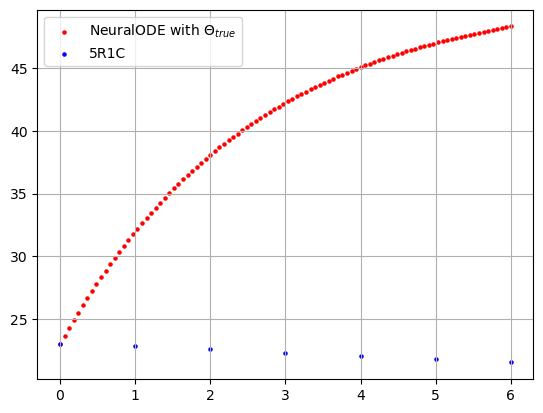

In [330]:
neural_ode.compare_with_physcis_model()

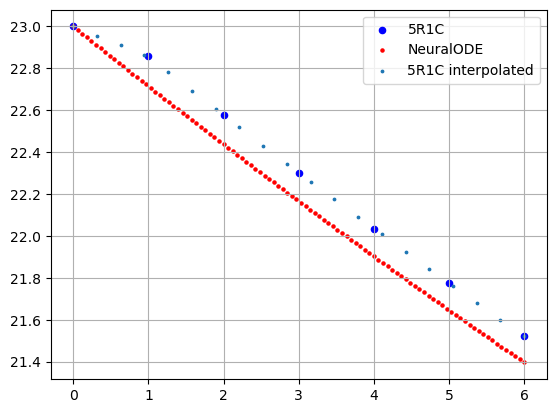

In [176]:
neural_ode.interpolate_points(20)

In [177]:
h_em

3.0

In [178]:
# define constraints on the parameters that will be applied during the training
def apply_constraints(model):
    for param_name, param in model.named_parameters():
                    if 'A_f' in param_name:  # Optionally exclude certain parameters
                        param.clamp_(30., 45.)
                    
                    if 'A_t' in param_name:  # Optionally exclude certain parameters
                        A_f = model.state_dict()['A_f'].item()
                        min_value = 2*A_f + 4*2.5*np.sqrt(A_f)
                        param.clamp_(min_value , 400)
                        
                    if 'h_em' in param_name:  # Optionally exclude certain parameters
                        param.clamp_(1., 4.)
                    if 'h_w' in param_name:  # Optionally exclude certain parameters
                        param.clamp_(1., 5.)
                    if 'h_ve' in param_name:  # Optionally exclude certain parameters
                        param.clamp_(20., 40)
                    if 'c_f' in param_name:  # Optionally exclude certain parameters
                        param.clamp_(1., 5.)    

In [179]:
# initialize parameters
h_em_ = (100.) * torch.rand(1,1)  # mean = 3.
h_w_ = (100.) * torch.rand(1,1)  # mean = 4.4000
h_ve_ = (10.) * torch.rand(1,1)  # mean = 38.5000
A_f_ = (100.) * torch.rand(1,1) # mean = 35.0
A_t_ = (100.) * torch.rand(1,1)  # mean = 142.
c_f_ = (50.) * torch.rand(1,1)   # mean = 160000.0/1e5

random_params_dict = {
    'A_f': torch.tensor([A_f_]),
    'A_t': torch.tensor([A_t_]),
    'h_em': torch.tensor([h_em_]),
    'h_w': torch.tensor([h_w_]),
    'h_ve': torch.tensor([h_ve_]),
    'c_f': torch.tensor([c_f_])
}

In [180]:
random_params_dict.keys()

dict_keys(['A_f', 'A_t', 'h_em', 'h_w', 'h_ve', 'c_f'])

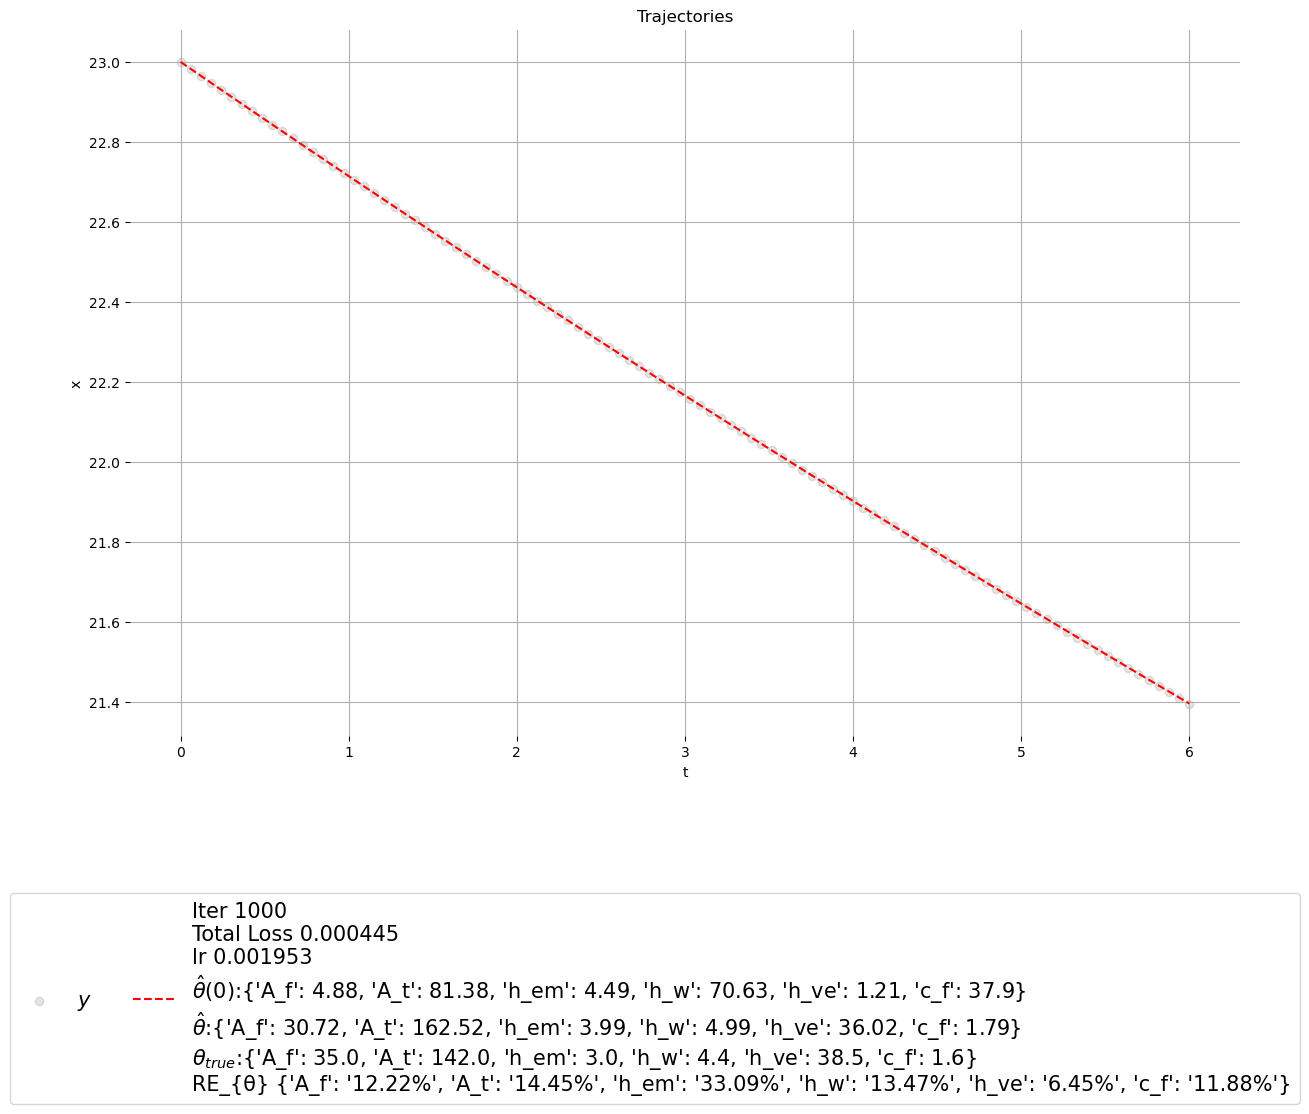

In [181]:
neural_ode.train(args=args,
                 true_y0=true_y0,
                 lr = 1,
                 optimizer=optim.RMSprop,
                 scheduler=torch.optim.lr_scheduler.StepLR, step_size=100, gamma=0.5,
                 initial_params_dict=random_params_dict, 
                 apply_constraints=apply_constraints)

### Validation 

In [182]:
neural_ode.ode_func.state_dict()

OrderedDict([('A_f', tensor([30.7242])),
             ('A_t', tensor([162.5192])),
             ('h_em', tensor([3.9927])),
             ('h_w', tensor([4.9928])),
             ('h_ve', tensor([36.0174])),
             ('c_f', tensor([1.7901]))])

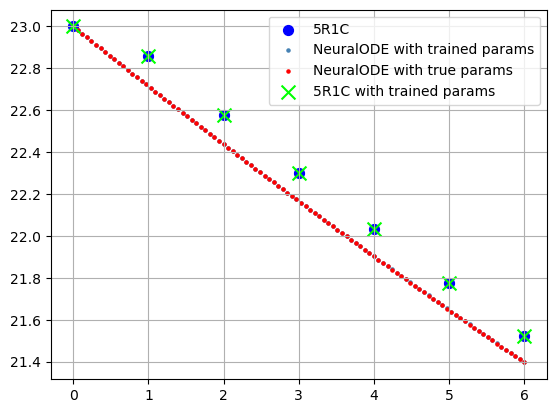

In [183]:
neural_ode.validation(23., neural_ode.ode_func.state_dict())

In [184]:
neural_ode.ode_func.state_dict()

OrderedDict([('A_f', tensor([30.7242])),
             ('A_t', tensor([162.5192])),
             ('h_em', tensor([3.9927])),
             ('h_w', tensor([4.9928])),
             ('h_ve', tensor([36.0174])),
             ('c_f', tensor([1.7901]))])

## Parameter Importance
---

In [185]:
from sklearn.metrics import mean_squared_error
import seaborn as sns

def MSE(t_m_prev, t, true_parameters_dict, inputs, phi_int, Te):
    t_np = np.arange(int(t[-0].item()), int(t[-1].item() + 1))
    def calculate_phi_m_tot(inputs):
        # Calculate phi_m_tot
        h_is = inputs['A_t'].item() * 3.45
        h_ms = 9.1 * (inputs['A_f'].item() * 2.5)
        h_tr1 = 1 / (1/inputs['h_ve'].item() + 1/h_is)
        h_tr3 = 1 / (1/(h_tr1 + inputs['h_w'].item()) + 1/h_ms)

        phi_m_tot = (2.5*A_f / (A_t)) * 0.5 * phi_int + h_em * Te + \
                (h_tr3 / (h_w + h_tr1)) * ((1 - (2.5*A_f / (A_t)) - \
                    (h_w / (9.1 * A_t))) * 0.5 * phi_int + Te * (h_w + h_tr1) + \
                        (h_tr1 / (h_ve)) * 0.5 * phi_int)

        return phi_m_tot

    def calc_t_m_next(t_m_prev, inputs):
        h_tr3 = 1 / (1/(h_tr1 + inputs['h_w'].item()) + 1/h_ms)
        h_em = inputs['h_em'].item()
        c_m = inputs['A_f'].item()*inputs['c_f'].item()*1e5

        phi_m_tot = calculate_phi_m_tot(inputs)


        t_m_next = ((t_m_prev * ((c_m / 3600.0) - 0.5 * (h_tr3 + h_em))) +
                         phi_m_tot) / ((c_m / 3600.0) + 0.5 * (h_tr3 + h_em))
        return t_m_next

    def calc_t_m(t_m_prev, inputs):
        t_m_next = calc_t_m_next(t_m_prev, inputs)
        t_m = (t_m_next + t_m_prev) / 2.0
        return t_m
    
    def calculate_temperatures(t_m_prev, inputs):
        #calculate true temperature values
        temperatures = [t_m_prev]
        for i in range(t_np[0], t_np[-1]):
            temperatures.append(calc_t_m(t_m_prev, inputs))
            t_m_prev = calc_t_m_next(t_m_prev, inputs)
        return temperatures
        
    true_y = calculate_temperatures(t_m_prev, true_parameters_dict)
    t_MM = calculate_temperatures(t_m_prev, inputs)
    mse = mean_squared_error(true_y, t_MM)
    
    #plt.scatter(t_np, true_y, label="5R1C", c="b", s=50)
    #plt.scatter(t_np, t_MM, s=100, c="g", marker="x", label="5R1C with trained params")
    #plt.legend()
    #plt.grid()
    #plt.show()
    
    return mse

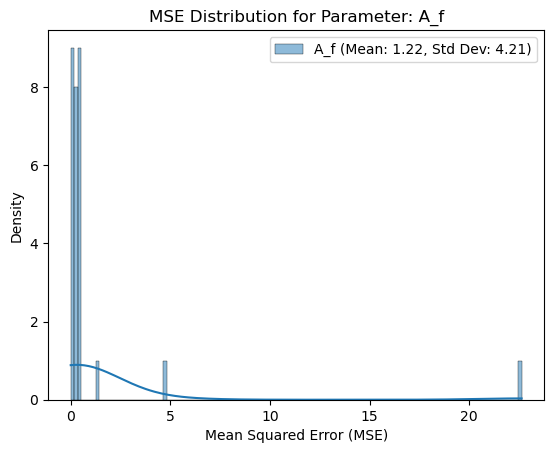

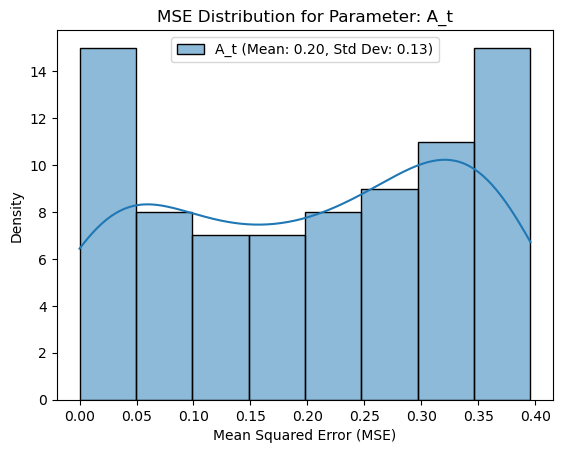

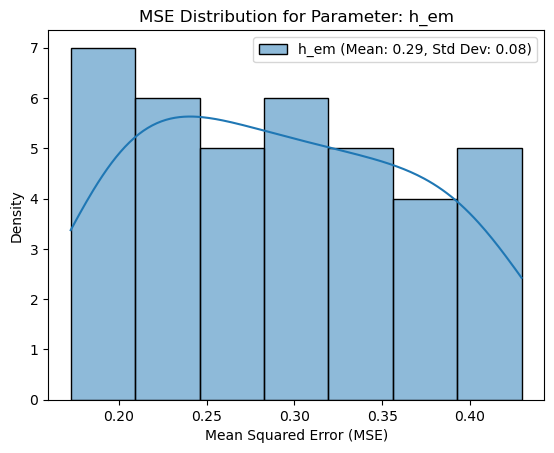

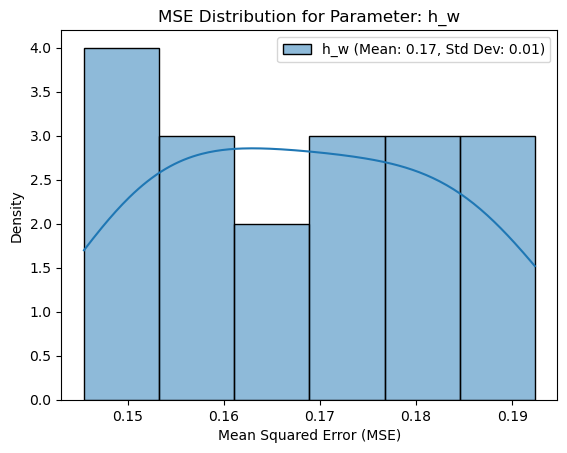

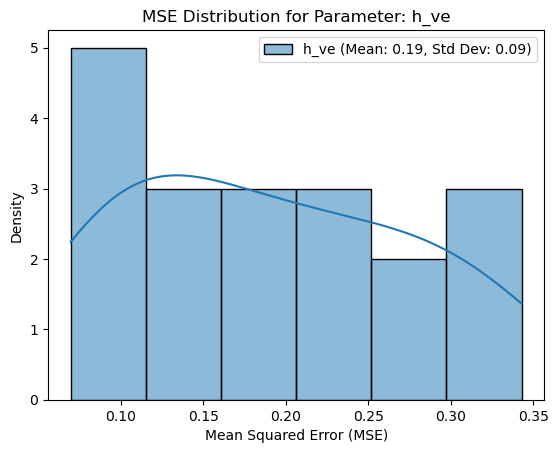

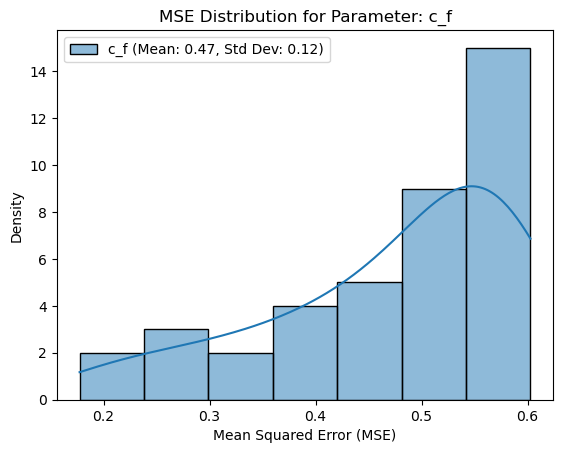

In [186]:
# Define a dictionary of parameter values to vary for each parameter
param_values = {
    'A_f': np.arange(0,150,5)[1:],
    'A_t': np.arange(100,500,5),
    'h_em': np.arange(1,20,0.5),
    'h_w': np.arange(1,10,0.5),
    'h_ve': np.arange(0,100,5)[1:],
    'c_f': np.arange(1,5,0.1)
}

# Initialize true parameters and other constants
true_parameters_dict = {
    'A_f': torch.tensor([35.]),
    'A_t': torch.tensor([142.]),
    'h_em': torch.tensor([3.]),
    'h_w': torch.tensor([4.4]),
    'h_ve': torch.tensor([38.5]),
    'c_f': torch.tensor([1.6])
}

random_parameters_dict = {
    'A_f': torch.tensor([35.]),
    'A_t': torch.tensor([142.]),
    'h_em': torch.tensor([3.]),
    'h_w': torch.tensor([4.4]),
    'h_ve': torch.tensor([38.5]),
    'c_f': torch.tensor([1.6])
}



t_m_prev = 23.  # Initialize t_m_prev
t = np.arange(int(t[0].item()), int(t[-1].item() + 1))  # Assuming you have t defined

# Perform parameter sensitivity analysis
results = {}
for param_name, values in param_values.items():
    mse_values = []
    for param_value in values:
        
        random_parameters_dict[param_name] = torch.tensor([param_value])  # Set the parameter value
        if param_name == 'A_f':
            random_parameters_dict['A_t'] = torch.tensor([param_value])*4
        if param_name == 'A_t':
            random_parameters_dict['A_f'] = torch.tensor([param_value])/4
            

        mse = MSE(t_m_prev, t, true_parameters_dict, random_parameters_dict, phi_int, Te)
        mse_values.append(mse)
    
    results[param_name] = mse_values
# Analyze the results (e.g., inspect the standard deviation of MSE for each parameter)
import statistics

for param_name, mse_values in results.items():
    mean = statistics.mean(mse_values)
    std_dev = statistics.stdev(mse_values)
    
    # Plot the histogram of MSE values
    sns.histplot(mse_values, kde=True, label=f"{param_name} (Mean: {mean:.2f}, Std Dev: {std_dev:.2f})")
    plt.xlabel("Mean Squared Error (MSE)")
    plt.ylabel("Density")
    plt.legend()
    plt.title(f"MSE Distribution for Parameter: {param_name}")
    plt.show()
    

----

## Defining new Neural ODE with including U-values.

\begin{equation}
T_m(H_{tr3} + H_{em}) + C_m\frac{dT_m}{dt} = \Phi_{mtot}
\end{equation} 

$$
\rightarrow \frac{dT_m}{dt} = \frac{1}{C_m}\left(\Phi_{m_{tot}} - (H_{tr3} + H_{em}) \cdot T_m\right) 
$$
with:  $$T_m(0) = 23$$

$$\Phi_{mtot} = \frac{A_f\cdot 2.5}{A_t}\cdot0.5\cdot\mathbf{\Phi_{int}} + H_{em}\cdot\mathbf{T_e} + \frac{H_{tr3}}{H_w + H_{tr1}}\left((1 - \frac{A_f\cdot 2.5}{A_t} - \frac{H_w}{9.1\cdot A_t})\cdot0.5\cdot\Phi_{int} + \mathbf{T_e}\cdot (H_w + H_{tr1}) +  \frac{H_{tr1}}{H_{ve}}\cdot0.5\cdot\mathbf{\Phi_{int}})\right)$$
where:
\begin{align}
H_{tr1} &= \frac{1}{1/H_{ve} + 1/H_{is}} \\
H_{tr2} &= H_{tr1} + H_w \\
H_{tr3} &= \frac{1}{1/H_{tr2} + 1/H_{ms}} \\
H_{ms} &= 9.1 \cdot (A_f \cdot 2.5) \\
H_{is} &= A_t \cdot 3.45
\end{align}

U-values appear in two heat conductances: $H_{em}$ and $H_w$, where:

#### $H_{em}$ - Heat conductance from the outside through opaque elements $[W/K]$
$$H_{em} = u_{walls} \cdot \text{walls_area}$$
where: 
- $u_{walls}$ is U-value of opaque surfaces  $[W/m^2K]$, with the range: $u_{walls} \in [0.1,3]$

- $\text{walls_area}$ is an area of all envelope surfaces, including windows in contact with the outside, $[m^2]$.
---
#### $H_{w}$ - Heat transfer from the outside through windows, doors [W/K], based on U-wert of 1W/m2K
$$H_{w} = u_{windows} \cdot \text{window_area}$$
where: 
- $u_{windows}$ is U-value of glazed surfaces  $[W/m^2K]$, with the range: $u_{windows} \in [1,6]$
- $\text{window_area}$ is an area of the glazed surface in contact with the outside, $[m^2]$.


<img src="./figures/wall_window_area.drawio.png" width=500>

## Building NeuralODE Train class

In [160]:
Te = cooling_experiment.temp_value #we first set the constant temperature of 1ºC (Te - external temperature)
t_out = Te
print("Te:", Te)
phi_int = cooling_experiment.internal_gains_[0]
print("phi_int:", phi_int)
A_f = cooling_experiment.office.floor_area 
print("A_f: ", A_f) 
A_t = cooling_experiment.office.A_t 
print("A_t: ", A_t)
h_ve = cooling_experiment.office.h_ve_adj
print("h_ve:", h_ve)
c_f = cooling_experiment.office.c_m / cooling_experiment.office.floor_area / 1e5
print("c_f:", c_f)
u_walls = cooling_experiment.office.u_walls
print("u_walls:", u_walls)
u_window = cooling_experiment.office.u_windows
print("u_window:", u_window)
walls_area = cooling_experiment.office.walls_area
print("walls_area:", walls_area)
window_area = cooling_experiment.office.window_area
print("window_area:", window_area) 

Te: 1
phi_int: 490.0
A_f:  35.0
A_t:  142.0
h_ve: 38.5
c_f: 1.6
u_walls: 0.2
u_window: 1.1
walls_area: 15.0
window_area: 4.0


In [331]:
#SCALED
Te = cooling_experiment.temp_value #we first set the constant temperature of 1ºC (Te - external temperature)
t_out = Te
print("Te:", Te)
phi_int = cooling_experiment.internal_gains_[0]
print("phi_int:", phi_int)
A_f = cooling_experiment.office.floor_area / 100
print("A_f: ", A_f) 
A_t = cooling_experiment.office.A_t  / 100
print("A_t: ", A_t)
h_ve = cooling_experiment.office.h_ve_adj / 100
print("h_ve:", h_ve)
c_f = cooling_experiment.office.c_m / cooling_experiment.office.floor_area / 1e5
print("c_f:", c_f)
u_walls = cooling_experiment.office.u_walls
print("u_walls:", u_walls)
u_window = cooling_experiment.office.u_windows
print("u_window:", u_window)
walls_area = cooling_experiment.office.walls_area / 100 
print("walls_area:", walls_area)
window_area = cooling_experiment.office.window_area / 100
print("window_area:", window_area) 

Te: 1
phi_int: 490.0
A_f:  0.35
A_t:  1.42
h_ve: 0.385
c_f: 1.6
u_walls: 0.2
u_window: 1.1
walls_area: 0.15
window_area: 0.04


In [332]:
class Lambda___u_values(nn.Module):
    """['A_f', 'A_t', 'h_ve', 'c_f', 'u_walls', 'u_window', 'walls_area', 'window_area']"""
    def __init__(self, Te, phi_int):
        super(Lambda___u_values, self).__init__()
        #constants
        self.Te = Te
        self.phi_int = phi_int

    def set_params(self, params_dict):
        for key, value in params_dict.items():
            setattr(self, key, nn.Parameter(value))

    def forward(self, t, x):
        
        A_t = self.A_t * 100
        A_f = self.A_f * 100
        h_ve = self.h_ve * 100
        walls_area = self.walls_area * 100
        window_area = self.window_area * 100
        
        
        h_em = self.u_walls * (walls_area)
        h_w = self.u_window * (window_area)
        h_is = (A_t) * 3.45
        h_ms = 9.1 * ((A_f) * 2.5)
        h_tr1 = 1 / (1/(h_ve) + 1/h_is)
        h_tr2 = h_tr1 + h_w
        h_tr3 = 1 / (1/(h_tr1 + h_w) + 1/h_ms)
        
        phi_m_tot = (2.5*(A_f) / ((A_t))) * 0.5 * self.phi_int + h_em * self.Te + \
                (h_tr3 / (h_tr2)) * ((1 - (2.5*(A_f) / ((A_t))) - \
                    (h_w / (9.1 * (A_t)))) * 0.5 * self.phi_int + self.Te * (h_tr2) + \
                        (h_tr1 / ((h_ve))) * 0.5 * self.phi_int)
        #phi_mtot = 497.1297858474096 #[W]
        return (1/((A_f)*self.c_f*1e5))*3600*(phi_m_tot -(h_tr3 + h_em)*x)

### check for $\Phi_{mtot}$

In [333]:
h_em = u_walls * (walls_area*100)
h_w = u_window * (window_area*100)
h_is = (A_t*100) * 3.45
h_ms = 9.1 * (A_f*100 * 2.5)
h_tr1 = 1 / (1/(h_ve*100) + 1/h_is)
h_tr2 = h_tr1 + h_w
h_tr3 = 1 / (1/(h_tr1 + h_w) + 1/h_ms)

phi_m_tot_u_values = (2.5*A_f*100 / ((A_t*100))) * 0.5 * phi_int + h_em * Te + \
        (h_tr3 / (h_tr2)) * ((1 - (2.5*A_f*100 / ((A_t*100))) - \
            (h_w / (9.1 * (A_t*100)))) * 0.5 * phi_int + Te * (h_tr2) + \
                (h_tr1 / ((h_ve*100))) * 0.5 * phi_int)

print("phi_m_tot:", phi_m_tot_u_values)
print("phi_m_tot_model:", phi_m_tot_model)
if phi_m_tot_model == phi_m_tot_u_values:
    print("Valid formula extension")
else: 
    print("Invalid")

phi_m_tot: 497.1297858474096
phi_m_tot_model: 497.1297858474096
Valid formula extension


### Training

In [334]:
# define true parameters
true_params_dict_u_values = {
    'A_f': torch.tensor([A_f]),
    'A_t': torch.tensor([A_t]),
    'h_ve': torch.tensor([h_ve]),
    'c_f': torch.tensor([c_f]),
    'u_walls': torch.tensor([u_walls]),
    'u_window': torch.tensor([u_window]),
    'walls_area': torch.tensor([walls_area]),
    'window_area': torch.tensor([window_area])
}
true_params_dict_u_values

{'A_f': tensor([0.3500]),
 'A_t': tensor([1.4200]),
 'h_ve': tensor([0.3850]),
 'c_f': tensor([1.6000]),
 'u_walls': tensor([0.2000]),
 'u_window': tensor([1.1000]),
 'walls_area': tensor([0.1500]),
 'window_area': tensor([0.0400])}

In [335]:
# define training parameters
args = {
    'method': 'rk4',
    'data_size': 100,
    'batch_time': 10,
    'batch_size': 10,
    'niters': 1000,
    'test_freq': 20,
    'viz': False,  # Change to True if visualization is needed
    'gpu': 0,
    'adjoint': True  # Change to True if using adjoint method
}

if args['adjoint']:
    from torchdiffeq import odeint_adjoint as odeint
else:
    from torchdiffeq import odeint

# define device  
device = torch.device('cuda:' + str(args['gpu']) if torch.cuda.is_available() else 'cpu')

# define initial temperature
true_y0 = torch.tensor([[23.]]).to(device)

# define time range
t = torch.linspace(0., 6., args['data_size']).to(device)

neural_ode_u_values = TrainNeuralODE(Lambda=Lambda___u_values, 
                              Te=Te,
                              phi_int=phi_int,
                              true_params_dict=true_params_dict_u_values, 
                              true_y0 = true_y0,
                              method = args['method'],
                              t=t)

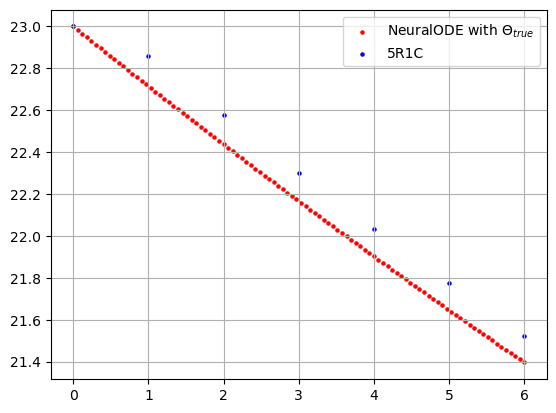

In [336]:
neural_ode_u_values.compare_with_physcis_model()

In [337]:
def apply_constraints_u_values(model):
    for param_name, param in model.named_parameters():
                    if 'A_f' in param_name: 
                        #param.clamp_(0.05, 1.5) # (5m^2, 150m^2)
                        param.clamp_(0.30, 0.35) # (5m^2, 150m^2)
                    
                    if 'A_t' in param_name:  
                        A_f = model.state_dict()['A_f'].item()*100
                        min_value = (2*A_f + 4*2.5*np.sqrt(A_f))/100
                        max_value = 2*(2*A_f + 4*2.5*np.sqrt(A_f))/100
                        param.clamp_(min_value , max_value)
                        
                    if 'h_ve' in param_name: 
                        param.clamp_(0.1, 1.)
                        
                    if 'c_f' in param_name:  
                        param.clamp_(1., 5.)
                    if 'u_walls' in param_name:
                        param.clamp_(0.1, 3.)
                        
                    if 'u_window' in param_name:
                        param.clamp_(1, 6.)
                        
                    if 'walls_area' in param_name:
                        min_value = 1*2*2.5 / 100 ## 1-wall, 2m wide, 2.5m high 
                        max_value = 4*10*3 / 100 ## 4-walls, 10m wide, 3m high
                        param.clamp_(min_value, max_value)
                        
                    if 'window_area' in param_name:
                        walls_area = model.state_dict()['walls_area'].item()
                        min_window_area = walls_area / 6.
                        max_window_area = walls_area / 2.
                        param.clamp_(min_window_area, max_window_area)


In [313]:
min_value = 1*2*2.5 / 100 ## 1-wall, 2m-wide, 2.5m-high 
max_value = 

SyntaxError: invalid syntax (3820485784.py, line 2)

In [338]:
#MODIFIED 
u_walls_ = (3.) * torch.rand(1,1)  
u_window_ = (6.) * torch.rand(1,1)  
walls_area_ = (1.20) * torch.rand(1,1)  
window_area_ = walls_area_/3
h_ve_ = (10.) * torch.rand(1,1)  # mean = 38.5000
A_f_ = (1.) * torch.rand(1,1) # mean = 35.0
A_t_ = (10.) * torch.rand(1,1)  # mean = 142.
c_f_ = (5.) * torch.rand(1,1)   # mean = 160000.0/1e5

random_params_dict_u_values = {
    'A_f': A_f_,
    'A_t': A_t_,
    'h_ve': h_ve_,
    'c_f': c_f_,
    'u_walls': u_walls_,
    'u_window': u_window_,
    'walls_area': walls_area_,
    'window_area': window_area_
}
random_params_dict_u_values

{'A_f': tensor([[0.0718]]),
 'A_t': tensor([[8.8208]]),
 'h_ve': tensor([[3.6697]]),
 'c_f': tensor([[4.5775]]),
 'u_walls': tensor([[2.4811]]),
 'u_window': tensor([[1.3025]]),
 'walls_area': tensor([[0.3762]]),
 'window_area': tensor([[0.1254]])}

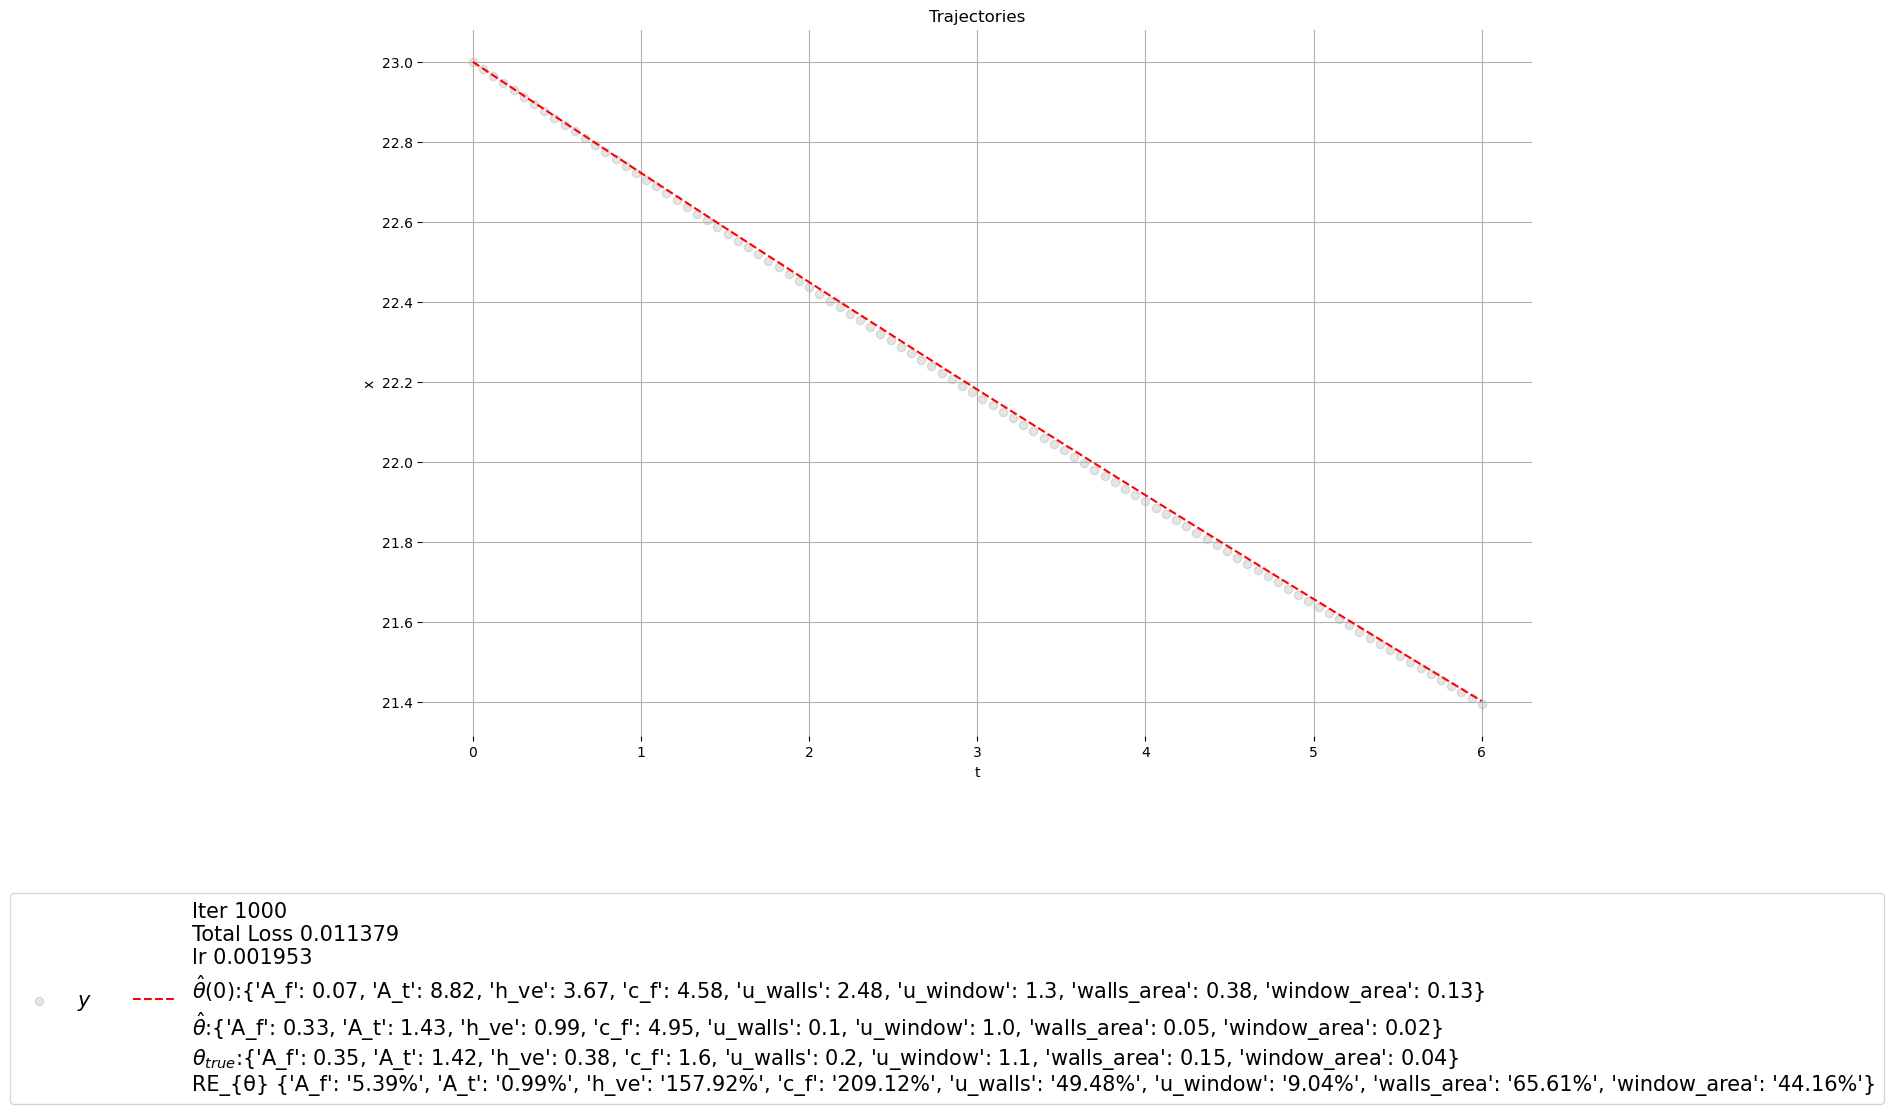

In [339]:
neural_ode_u_values.train(args=args,
                 true_y0=true_y0,
                 lr = 1,
                 optimizer=optim.RMSprop,
                 scheduler=torch.optim.lr_scheduler.StepLR, step_size=100, gamma=0.5,
                 initial_params_dict=random_params_dict_u_values, 
                 apply_constraints=apply_constraints_u_values)

In [340]:
neural_ode_u_values.ode_func.state_dict()

OrderedDict([('A_f', tensor([[0.3311]])),
             ('A_t', tensor([[1.4340]])),
             ('h_ve', tensor([[0.9930]])),
             ('c_f', tensor([[4.9459]])),
             ('u_walls', tensor([[0.1010]])),
             ('u_window', tensor([[1.0006]])),
             ('walls_area', tensor([[0.0516]])),
             ('window_area', tensor([[0.0223]]))])

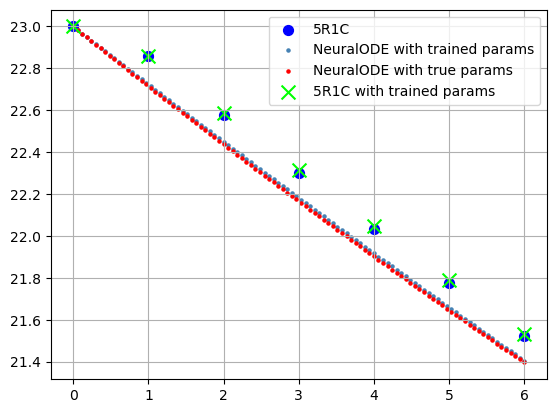

In [341]:
neural_ode_u_values.validation2(23., neural_ode_u_values.ode_func.state_dict())

## A_f - constant

In [ ]:
class TrainNeuralODE:
    def __init__(self, Lambda, Te, phi_int,true_params_dict, true_y0, t, method='dopri5'):
        
        self.Lambda = Lambda
        
        self.true_params_dict = true_params_dict #true parameters
        self.Te = Te #outside temperature
        self.phi_int = phi_int #internal gains
        self.true_y0 = true_y0 #initial temperature value
        self.t = t #time period
        self.method = method #method
        
        #define true_ode
        self.true_ode = Lambda(Te=self.Te, phi_int=self.phi_int)
        self.true_ode.set_params(true_params_dict)
        
        #perform forward pass
        with torch.no_grad():
            self.true_y = odeint(self.true_ode, self.true_y0, self.t, method=self.method)
            self.true_y_np = self.true_y.detach().flatten().numpy()
        
    
    def compare_with_physcis_model(self):
        self.true_y_np = self.true_y.flatten().numpy()
        self._t_ms = np.array([cooling_experiment.t_m_prev] + cooling_experiment.t_ms)
        self._hours = cooling_experiment.hours + [max(cooling_experiment.hours)+1]
        
        plt.scatter(t, self.true_y_np, label="NeuralODE", c="r", s=5)
        plt.scatter(self._hours, self._t_ms, label="5R1C", c="b", s=5)
        plt.legend()
        plt.grid()
        
    def interpolate_points(self, num_points=100):
        # Create an interpolation function
        interp_func = interp1d(self._hours, self._t_ms, kind='linear')

        # Generate 100 evenly spaced points
        self.hours_interpolated = np.linspace(min(self._hours), max(self._hours),num_points)
        self.t_ms_interpolated = interp_func(self.hours_interpolated)
        plt.scatter(self._hours, self._t_ms, label="5R1C", c="b", s=20)
        plt.scatter(self.t, self.true_y_np, label="NeuralODE", c="r", s=5)
        plt.scatter(self.hours_interpolated, self.t_ms_interpolated, s=3, label="5R1C interpolated")
        plt.legend()
        plt.grid()

        
        
    def train(self, args, true_y0, lr=1, optimizer=optim.RMSprop, scheduler=None, step_size=100, gamma=0.5, initial_params_dict=None, apply_constraints=None):
        
        #save the training arguments
        self.args = args
        
        if initial_params_dict is None: 
            raise ValueError("initial_params_dict is None, please provide dictionary of parameter values")
        self.initial_params_dict = copy.deepcopy(initial_params_dict)
        self.initial_param_values = [np.round(self.initial_params_dict[i].item(),2) for i in self.initial_params_dict]
        
    
        self.ode_func = self.Lambda(Te=Te, phi_int=phi_int)
        self.ode_func.set_params(initial_params_dict)
    
    
        self.true_param_values = [np.round(self.true_params_dict[i].item(),2) for i in self.true_params_dict]
        

        ii = 0
        optimizer = optimizer(self.ode_func.parameters(), lr=lr)
        if scheduler is not None: 
            scheduler = scheduler(optimizer, step_size=step_size, gamma=gamma)
        #optimizer = optim.RMSprop(self.ode_func.parameters(), lr=lr)
        #scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=300, gamma=0.5)
        end = time.time()

        time_meter = RunningAverageMeter(0.97)
        loss_meter = RunningAverageMeter(0.97)


        for itr in range(1, args["niters"] + 1):
            optimizer.zero_grad()
            batch_y0, batch_t, batch_y = get_batch(args=args, true_y=self.true_y, t=t, device=device)

            pred_y = odeint(self.ode_func, batch_y0, batch_t, method=self.method).to(device)
            loss = torch.mean(torch.abs(pred_y - batch_y))
            loss.backward()
            

            predicted_params_dict = self.ode_func.state_dict()

            lr = optimizer.param_groups[0]['lr']
            
            time_meter.update(time.time() - end)
            loss_meter.update(loss.item())

                
            if apply_constraints is not None: 
                with torch.no_grad():
                    apply_constraints(self.ode_func)
                    
            optimizer.step()
            if scheduler is not None: 
                    scheduler.step()
            
            if itr % args["test_freq"] == 0:
                with torch.no_grad():
                    pred_y = odeint(self.ode_func, true_y0, t)
                    loss = torch.mean(torch.abs(pred_y - self.true_y))
                    #print('Iter {:04d} | Total Loss {:.6f}'.format(itr, loss.item()))
                    visualize(self.true_y, pred_y, t, self.ode_func, itr, current_loss = loss, lr = lr,
                              true_params_dict=self.true_params_dict, true_param_values=self.true_param_values, predicted_params_dict = predicted_params_dict, 
                              initial_params_dict = self.initial_params_dict, initial_param_values = self.initial_param_values, 
                              batch_t = batch_t, batch_y=batch_y)
                    ii += 1
                clear_output(wait=True)
                
                
    def calculate_phi_m_tot(self, inputs):

        # Calculate phi_m_tot
        h_is = inputs['A_t'].item() * 3.45
        h_ms = 9.1 * (35. * 2.5)
        h_tr1 = 1 / (1/inputs['h_ve'].item() + 1/h_is)
        h_tr3 = 1 / (1/(h_tr1 + inputs['h_w'].item()) + 1/h_ms)

        phi_m_tot = (2.5*A_f / (A_t)) * 0.5 * phi_int + h_em * Te + \
                (h_tr3 / (h_w + h_tr1)) * ((1 - (2.5*A_f / (A_t)) - \
                    (h_w / (9.1 * A_t))) * 0.5 * self.phi_int + self.Te * (h_w + h_tr1) + \
                        (h_tr1 / (h_ve)) * 0.5 * self.phi_int)

        return phi_m_tot
    

    def validation(self, t_m_prev, inputs):
        
        def calc_t_m_next(t_m_prev, inputs):
            h_tr3 = 1 / (1/(h_tr1 + inputs['h_w'].item()) + 1/h_ms)
            h_em = inputs['h_em']
            c_m = 35.*inputs['c_f']*1e5

            phi_m_tot = self.calculate_phi_m_tot(inputs)


            t_m_next = ((t_m_prev * ((c_m / 3600.0) - 0.5 * (h_tr3 + h_em))) +
                             phi_m_tot) / ((c_m / 3600.0) + 0.5 * (h_tr3 + h_em))
            return t_m_next
        
        def calc_t_m(t_m_prev, inputs):
            t_m_next = calc_t_m_next(t_m_prev, inputs)
            t_m = (t_m_next + t_m_prev) / 2.0
            return t_m
        

        t_MM = [t_m_prev]
        for i in range(int((max(self.t)).item())):
            t_MM.append(calc_t_m(t_m_prev, inputs))
            t_m_prev = calc_t_m_next(t_m_prev, inputs)
        
        with torch.no_grad():
            trained_y = odeint(self.ode_func, self.true_y0, self.t, method=self.args['method'])
            trained_y_np = trained_y.detach().flatten().numpy()
        
        plt.scatter(self._hours, self._t_ms, label="5R1C", c="b", s=50)
        plt.scatter(self.t, trained_y_np, label="NeuralODE with trained params", c="steelblue", s=5)
        plt.scatter(self.t, self.true_y_np, label="NeuralODE with true params", c="r", s=5)
        plt.scatter(self._hours, t_MM, s=100, c="g", marker="x", label="5R1C with trained params")
        plt.legend()
        plt.grid()

In [ ]:
class Lambda___u_values(nn.Module):
    """REDUCED NUMBER OF PARAMETERS"""
    def __init__(self, Te, phi_int):
        super(Lambda___u_values, self).__init__()
        #constants
        self.Te = Te
        self.phi_int = phi_int
        self.A_f = 0.35

    def set_params(self, params_dict):
        for key, value in params_dict.items():
            setattr(self, key, nn.Parameter(value))

    def forward(self, t, x):
        h_em = self.u_walls * (self.walls_area*100)
        h_w = self.u_window * (self.window_area*100)
        
        h_is = (self.A_t*100) * 3.45
        h_ms = 9.1 * ((self.A_f*100) * 2.5)
        h_tr1 = 1 / (1/self.h_ve + 1/h_is)
        h_tr2 = h_tr1 + h_w
        h_tr3 = 1 / (1/(h_tr1 + h_w) + 1/h_ms)
        
        phi_m_tot = (2.5*(self.A_f*100) / ((self.A_t*100))) * 0.5 * self.phi_int + self.h_em * self.Te + \
                (h_tr3 / (h_tr2)) * ((1 - (2.5*(self.A_f*100) / ((self.A_t*100))) - \
                    (h_w / (9.1 * (self.A_t*100)))) * 0.5 * self.phi_int + self.Te * (h_tr2) + \
                        (h_tr1 / (self.h_ve)) * 0.5 * self.phi_int)
        #phi_mtot = 497.1297858474096 #[W]
        return (1/((self.A_f*100)*self.c_f*1e5))*3600*(phi_m_tot -(h_tr3 + self.h_em)*x)

### check for $\Phi_{mtot}$

In [ ]:
h_em = u_walls * (walls_area*100)
h_w = u_window * (window_area*100)
h_is = (A_t*100) * 3.45
h_ms = 9.1 * (A_f*100 * 2.5)
h_tr1 = 1 / (1/h_ve + 1/h_is)
h_tr2 = h_tr1 + h_w
h_tr3 = 1 / (1/(h_tr1 + h_w) + 1/h_ms)

phi_m_tot_u_values = (2.5*A_f*100 / ((A_t*100))) * 0.5 * phi_int + h_em * Te + \
        (h_tr3 / (h_tr2)) * ((1 - (2.5*A_f*100 / ((A_t*100))) - \
            (h_w / (9.1 * (A_t*100)))) * 0.5 * phi_int + Te * (h_tr2) + \
                (h_tr1 / (h_ve)) * 0.5 * phi_int)

print("phi_m_tot:", phi_m_tot_u_values)
print("phi_m_tot_model:", phi_m_tot_model)
if phi_m_tot_model == phi_m_tot_u_values:
    print("Valid formula extension")
else: 
    print("Invalid")

### Training

In [ ]:
# define true parameters
true_params_dict_u_values = {
    'A_t': torch.tensor([A_t]),
    'h_em': torch.tensor([h_em]),
    'h_w': torch.tensor([h_w]),
    'h_ve': torch.tensor([h_ve]),
    'c_f': torch.tensor([c_f]),
    'u_walls': torch.tensor([u_walls]),
    'u_window': torch.tensor([u_window]),
    'walls_area': torch.tensor([walls_area]),
    'window_area': torch.tensor([window_area])
}
true_params_dict_u_values

In [ ]:
# define training parameters
args = {
    'method': 'dopri5',
    'data_size': 1000,
    'batch_time': 10,
    'batch_size': 10,
    'niters': 1000,
    'test_freq': 20,
    'viz': False,  # Change to True if visualization is needed
    'gpu': 0,
    'adjoint': True  # Change to True if using adjoint method
}

if args['adjoint']:
    from torchdiffeq import odeint_adjoint as odeint
else:
    from torchdiffeq import odeint

# define device  
device = torch.device('cuda:' + str(args['gpu']) if torch.cuda.is_available() else 'cpu')

# define initial temperature
true_y0 = torch.tensor([[23.]]).to(device)

# define time range
t = torch.linspace(0., 6., args['data_size']).to(device)

neural_ode_u_values = TrainNeuralODE(Lambda=Lambda___u_values, 
                              Te=Te,
                              phi_int=phi_int,
                              true_params_dict=true_params_dict_u_values, 
                              true_y0 = true_y0,
                              method = 'dopri5',
                              t=t)

In [ ]:
neural_ode_u_values.compare_with_physcis_model()

In [ ]:
def apply_constraints_u_values(model):
    for param_name, param in model.named_parameters():
                    if 'A_f' in param_name:  # Optionally exclude certain parameters
                        param.clamp_(0.1, 1.5)
                    if 'A_t' in param_name:  # Optionally exclude certain parameters
                        param.clamp_(1., 5.)
                    if 'h_em' in param_name:  # Optionally exclude certain parameters
                        param.clamp_(0., 10.)
                    if 'h_w' in param_name:  # Optionally exclude certain parameters
                        param.clamp_(1., 10.)
                    if 'h_ve' in param_name:  # Optionally exclude certain parameters
                        param.clamp_(0., 100)
                    if 'c_f' in param_name:  # Optionally exclude certain parameters
                        param.clamp_(1., 5.)
                    if 'u_walls' in param_name:
                        param.clamp_(0.1, 3.)
                    if 'u_window' in param_name:
                        param.clamp_(1, 6.)
                    if 'walls_area' in param_name:
                        param.clamp_(0.6, 2.)
                    if 'window_area' in param_name:
                        param.clamp_(0.1, 0.4)
        
    parameters = model.state_dict() 
    difference = 4.
    parameters["A_t"] = torch.tensor([[0.35]]) * difference 
    
    difference = 2.
    parameters['window_area'] = parameters['walls_area']/2
    
    model.load_state_dict(parameters)

In [ ]:
true_params_dict_u_values

In [ ]:
#MODIFIED 
u_walls_ = (3.) * torch.rand(1,1)  
u_window_ = (6.) * torch.rand(1,1)  
walls_area_ = (1.20) * torch.rand(1,1)  
window_area_ = walls_area_/3
h_ve_ = (10.) * torch.rand(1,1)  # mean = 38.5000
A_f_ = (10.) * torch.rand(1,1) # mean = 35.0
A_t_ = (10.) * torch.rand(1,1)  # mean = 142.
c_f_ = (5.) * torch.rand(1,1)   # mean = 160000.0/1e5

random_params_dict_u_values = {
    'A_t': A_t_,
    'h_em': h_em_,
    'h_w': h_w_,
    'h_ve': h_ve_,
    'c_f': c_f_,
    'u_walls': u_walls_,
    'u_window': u_window_,
    'walls_area': walls_area_,
    'window_area': window_area_
}
random_params_dict_u_values

In [ ]:
neural_ode_u_values.train(args=args,
                 true_y0=true_y0,
                 lr = 0.1,
                 optimizer=optim.RMSprop,
                 scheduler=torch.optim.lr_scheduler.StepLR, step_size=100, gamma=0.5,
                 initial_params_dict=random_params_dict_u_values, 
                 apply_constraints=apply_constraints_u_values)

In [ ]:
neural_ode_u_values.ode_func.state_dict()

In [ ]:
neural_ode_u_values.validation(23., neural_ode_u_values.ode_func.state_dict())